# Main

In [778]:
# Importer la bibliothèque pandas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Charger les deux fichiers CSV
api_results_df = pd.read_csv("lovoo_v3_users_api-results.csv")
instances_df = pd.read_csv("lovoo_v3_users_instances.csv")

# Supprimer les doublons avant la fusion
api_results_df = api_results_df.drop_duplicates(subset='pictureId')
instances_df = instances_df.drop_duplicates(subset='pictureId')

# Fusionner les deux dataframes sur 'pictureId'
merged_df = pd.merge(api_results_df, instances_df, on='pictureId', how='outer')

# Afficher les premières lignes du DataFrame fusionné
merged_df.head()


gender_x genderLooking  age_x  name_x  counts_details  counts_pictures_x  \
0        F             M   21.0     M*l            0.92                5.0   
1        F             M   26.0   So**a            0.27               18.0   
2      NaN           NaN    NaN     NaN             NaN                NaN   
3        F             M   22.0  Ser**a            0.85                6.0   
4        F             M   26.0   So**a            0.27               18.0   

   counts_profileVisits_x  counts_kisses_x  counts_fans  counts_g  \
0                   378.0             26.0          0.0       0.0   
1                  8331.0            650.0          0.0       0.0   
2                     NaN              NaN          NaN       NaN   
3                   988.0             95.0          0.0       0.0   
4                  6446.0            543.0          0.0       0.0   

  flirtInterests_chat_x flirtInterests_friends_x flirtInterests_date_x  \
0                  True                    False                 False   
1                  True                    False                 False   
2                   NaN                      NaN                   NaN   
3                 False                    False                  True   
4                  True                    False                 False   

  country       city_x     location  distance_x  isFlirtstar  isHighlighted  \
0      CH  Froideville  Froideville         NaN          0.0            0.0   
1      AT     Hohenems     Hohenems         NaN          0.0            0.0   
2     NaN          NaN          NaN         NaN          NaN            NaN   
3      CH     Lausanne   Saint-Prex         NaN          0.0            0.0   
4      AT     Hohenems     Hohenems         NaN          0.0            0.0   

   isInfluencer  isMobile  isNew  isOnline  isVip  lang_count_x lang_fr_x  \
0           0.0       1.0    1.0       1.0    0.0           1.0      True   
1           0.0       1.0    0.0       1.0    0.0           1.0     False   
2           NaN       NaN    NaN       NaN    NaN           NaN       NaN   
3           0.0       1.0    0.0       0.0    0.0           1.0      True   
4           0.0       1.0    0.0       1.0    0.0           1.0     False   

  lang_en_x lang_de_x lang_it_x lang_es_x lang_pt_x  verified  \
0     False     False     False     False     False       0.0   
1      True     False     False     False     False       0.0   
2       NaN       NaN       NaN       NaN       NaN       NaN   
3     False     False     False     False     False       0.0   
4      True     False     False     False     False       0.0   

   shareProfileEnabled        lastOnlineDate  lastOnlineTime  birthd  crypt_x  \
0                  0.0  2015-04-06T12:55:45Z    1.428325e+09     0.0      1.0   
1                  1.0  2015-04-19T10:57:58Z    1.429441e+09     0.0      1.0   
2                  NaN                   NaN             NaN     NaN      NaN   
3                  1.0  2015-04-05T07:13:49Z    1.428218e+09     0.0      1.0   
4                  1.0  2015-04-06T16:17:45Z    1.428337e+09     0.0      1.0   

  freetext                                          whazzup_x  \
0      NaN  Je ne suis pas compliquée...je sais ce que je ...   
1      NaN                                                NaN   
2      NaN                                                NaN   
3      NaN                                   Fiesta and sport   
4      NaN                                                NaN   

                                            userId_x  \
0  CRY92UuuU2F9Rgnb1Y1RsKJuQNhZkpGZzkGlkCZJJ1pr4m...   
1  CRYXj7mIkXaFHnZQydGTAJrGNQdgf8TsrlfQwzyDGvsP30...   
2                                                NaN   
3  CRY5RO0lgr3aI+zZ2pMofjnaT0lx1dANXjbL5uWGBxDpBs...   
4  CRY909K58FFXaP7wk9eBMiZdInn6bXQBYylRcKGHvbUvja...   

                          pictureId  isSystemProfile_x gender_y  age_y  \
0  1f53eb02dd41c928ee12192f663b8bc4                NaN 

In [779]:
# Identifier les colonnes dupliquées
colonnes_doublons = [col for col in merged_df.columns if col.endswith('_x') or col.endswith('_y')]

# Afficher les colonnes dupliquées
colonnes_doublons

# Supposons que nous choisissons de conserver les colonnes suffixées par `_x`
colonnes_a_supprimer = [col for col in merged_df.columns if col.endswith('_y')]
dataset = merged_df.drop(columns=colonnes_a_supprimer)

# Renommer les colonnes pour enlever le suffixe `_x`
dataset.columns = [col.replace('_x', '') for col in dataset.columns]

# Afficher les premières lignes du DataFrame nettoyé
dataset.head()

# Obtenir le nombre total de lignes dans le DataFrame
total_lignes = dataset.shape[0]

# Afficher le nombre total de lignes
print(f"Le dataset contient un total de {total_lignes} lignes.")


Le dataset contient un total de 3885 lignes.


In [780]:
import pandas as pd

# SUPPRESSION DES DONNÉES EN DOUBLON 

# Filtrer les enregistrements qui ne sont pas en double ou où pictureId est vide
dataset_unique = dataset[~dataset['pictureId'].duplicated() | dataset['pictureId'].isnull()]

# Affecter les résultats uniques au jeu de données d'origine
dataset = dataset_unique.copy()

# CONVERSION DES DONNÉES

# CONVERSION DES DONNÉES BINAIRES

# Mapping des valeurs
mapping = {'true': 1, 'false': 0}

# Appliquer le mapping à chaque colonne
dataset['flirtInterests_chat'] = dataset['flirtInterests_chat'].replace(mapping)
dataset['flirtInterests_friends'] = dataset['flirtInterests_friends'].replace(mapping)
dataset['flirtInterests_date'] = dataset['flirtInterests_date'].replace(mapping)
dataset['crypt'] = dataset['crypt'].replace(mapping)
dataset['flirtstar'] = dataset['flirtstar'].replace(mapping)
dataset['freshman'] = dataset['freshman'].replace(mapping)
dataset['hasBirthday'] = dataset['hasBirthday'].replace(mapping)
dataset['highlighted'] = dataset['highlighted'].replace(mapping)
dataset['mobile'] = dataset['mobile'].replace(mapping)
dataset['online'] = dataset['online'].replace(mapping)
dataset['isSystemProfile'] = dataset['isSystemProfile'].replace(mapping)

# Discrétisation de la variable 'gender' selon les catégories spécifiées
def discretiser_gender(categorie):
    if categorie == 'M':
        return 1
    elif categorie == 'F':
        return 2
    elif categorie == 'both':
        return 3
    elif categorie == 'none':
        return 4

# Appliquer la fonction de discrétisation à la colonne 'gender' et créer une nouvelle colonne 'gender_discretise'
dataset['gender_discretise'] = dataset['gender'].apply(discretiser_gender).fillna(0)

# Appliquer la fonction de discrétisation à la colonne 'genderLooking' et créer une nouvelle colonne 'gender_look_discretise'
dataset['gender_look_discretise'] = dataset['genderLooking'].apply(discretiser_gender).fillna(0)

# Identifier les colonnes booléennes
colonnes_boolean = dataset.select_dtypes(include='bool').columns

# Convertir les colonnes booléennes en valeurs binaires (1 pour True, 0 pour False)
dataset[colonnes_boolean] = dataset[colonnes_boolean].astype(int)

# CONVERSION DES COLONNES NUMERIQUES

# Liste des colonnes à convertir en numérique et à gérer les valeurs nulles
colonnes_numeriques = ['age', 'gender_discretise', 'counts_details', 'counts_pictures', 'counts_profileVisits', 
                       'counts_kisses', 'counts_fans', 'counts_g', 'distance', 
                       'isFlirtstar', 'isHighlighted', 'isMobile', 'isNew', 
                       'isOnline', 'isVip', 'lang_count', 'verified', 'shareProfileEnabled',
                       'flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date']

# Boucler sur chaque colonne et appliquer la conversion ainsi que le remplissage des valeurs nulles
for col in colonnes_numeriques:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

# Eliminer les lignes où une des colonnes numériques contient NaN
dataset = dataset.dropna(subset=colonnes_numeriques)


# CRÉATION DE NOUVELLES CARACTÉRISTIQUES ET DISCRETISATION 

# Calculer le taux de bisous par visite et arrondir à deux décimales
dataset['taux_aime'] = (dataset['counts_kisses'] / dataset['counts_profileVisits'] * 100).round(2)

# Discrétisation de la variable taux_aime dans une nouvelle colonne 'aime_5_pct', selon les conditions spécifiées
dataset['aime_5_pct'] = dataset['taux_aime'].apply(lambda x: 0 if x < 5 else 1)

# Discrétisation de la variable counts_profileVisits dans une nouvelle colonne '10_visites' selon les conditions spécifiées
dataset['10_visites'] = dataset['counts_profileVisits'].apply(lambda x: 0 if x < 10 else 1)  

# Créer la nouvelle colonne 'compte_populaire' basée sur les conditions spécifiées
dataset['compte_populaire'] = dataset.apply(lambda row: 1 if row['aime_5_pct'] == 1 and row['10_visites'] == 1 else 0, axis=1)

# APERCU DES RÉSULTATS CONVERTIS

# Définir les options d'affichage pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes

# Imprimer les premières lignes du DataFrame avec toutes les colonnes
print(dataset.head())

print("\n")

# Compter combien de fois "plus_10_visites" apparaît dans la colonne 10_visites
count_plus_10_visites = dataset['10_visites'].value_counts().get(1, 0)

print(f'Nombre de "plus_10_visites": {count_plus_10_visites}')

# Compter combien de fois "plus_5_pct_aime" apparaît dans la colonne aime_5_pct
count_plus_5_pct_aime = dataset['aime_5_pct'].value_counts().get(1, 0)

print(f'Nombre de "plus_5_pct_aime": {count_plus_5_pct_aime}')

# Compter combien de fois "populaire" apparaît dans la colonne compte_populaire
count_populaire = dataset['compte_populaire'].value_counts().get(1, 0)

# Afficher le nombre de fois où "populaire" apparaît dans la colonne compte_populaire
print(f'Nombre de valeurs "populaire": {count_populaire}')


  gender genderLooking   age      name  counts_details  counts_pictures  \
5      F             M  22.0  Madeline            0.96              4.0   
6      F             M  25.0      tina            0.92              7.0   
7      F             M  22.0   Chantal            0.81              3.0   
8      F             M  20.0      Suzi            0.96              8.0   
9      F             M  19.0    Ramona            0.73              6.0   

   counts_profileVisits  counts_kisses  counts_fans  counts_g  \
5                1710.0          116.0          1.0       1.0   
6                3413.0           86.0          0.0       1.0   
7               54332.0         1196.0          0.0       2.0   
8                7979.0          138.0          4.0       0.0   
9                7571.0          396.0          7.0       3.0   

   flirtInterests_chat  flirtInterests_friends  flirtInterests_date country  \
5                  0.0                     0.0                  1.0      DE   


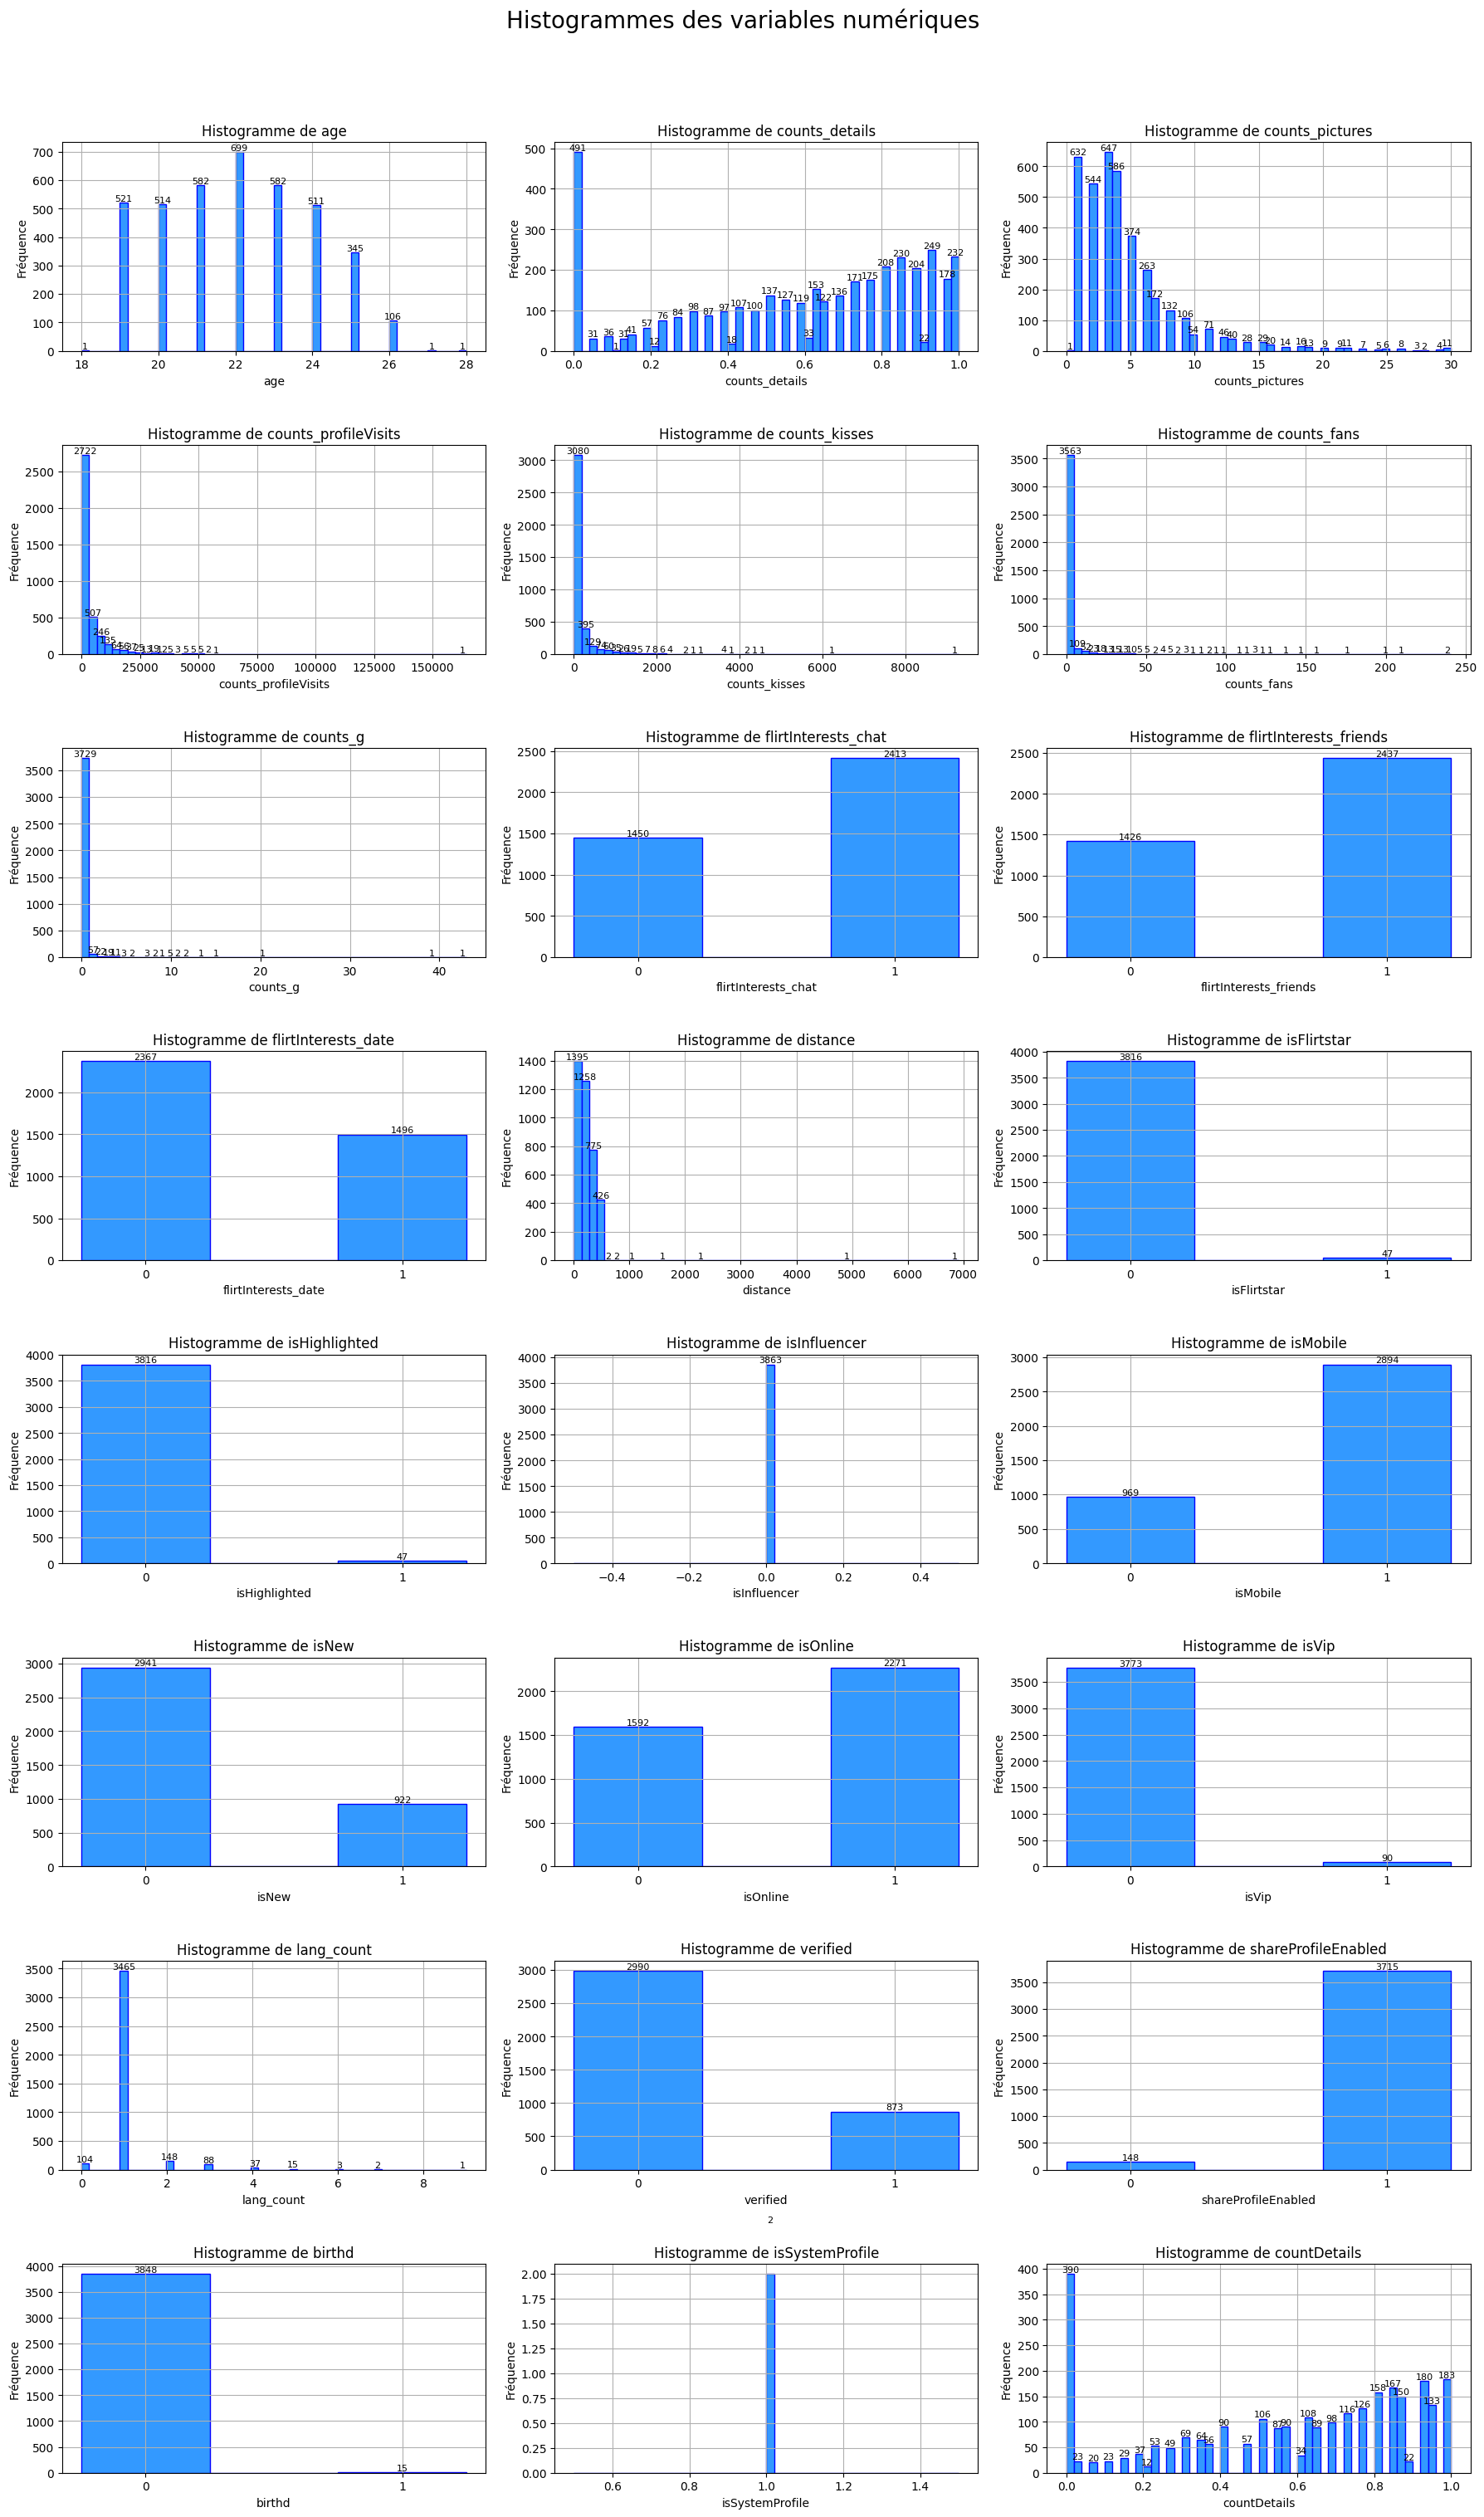

In [781]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def afficher_histogrammes(dataset, titre):
    # Sélectionner les colonnes numériques, exclure 'crypt' et 'isOnline'
    colonnes_numeriques = dataset.select_dtypes(include=['int64', 'float64']).columns[:27]
    colonnes_a_exclure = ['crypt', 'lastOnlineTime', 'lastOnlineTs']
    colonnes_numeriques = [col for col in colonnes_numeriques if col not in colonnes_a_exclure]
    
    # Ajuster la taille de la figure pour afficher les histogrammes
    plt.figure(figsize=(18, 40))
    plt.suptitle(titre, y=1.02, fontsize=20)
    
    # Itérer sur chaque colonne sélectionnée du dataset
    for i, col in enumerate(colonnes_numeriques):
        # Créer un subplot pour chaque histogramme
        ax = plt.subplot(11, 3, i + 1)
        
        # Supprimer les lignes avec des NaN dans la colonne courante
        data_col = dataset[col].dropna()
        
        # Vérifier si la colonne est binaire (0 ou 1)
        if data_col.nunique() == 2 and set(data_col.unique()) == {0, 1}:
            counts, bins, _ = ax.hist(data_col, bins=[-0.25, 0.25, 0.75, 1.25], color='#3399FF', edgecolor='blue', align='mid')
            plt.xticks([0, 1], ['0', '1'])
        else:
            counts, bins, _ = ax.hist(data_col, bins=50, color='#3399FF', edgecolor='blue')
        
        plt.title(f'Histogramme de {col}', fontsize=12)
        plt.xlabel(col, fontsize=10)
        plt.ylabel('Fréquence', fontsize=10)
        plt.grid(True)
        
        for count, x in zip(counts, bins):
            if count != 0:
                ax.text(x + (bins[1] - bins[0]) / 2, count + 0.5, int(count), ha='center', va='bottom', fontsize=8, color='black')
    
    plt.tight_layout()
    plt.show()

# Utilisation avec votre ensemble de données
afficher_histogrammes(dataset, "Histogrammes des variables numériques")


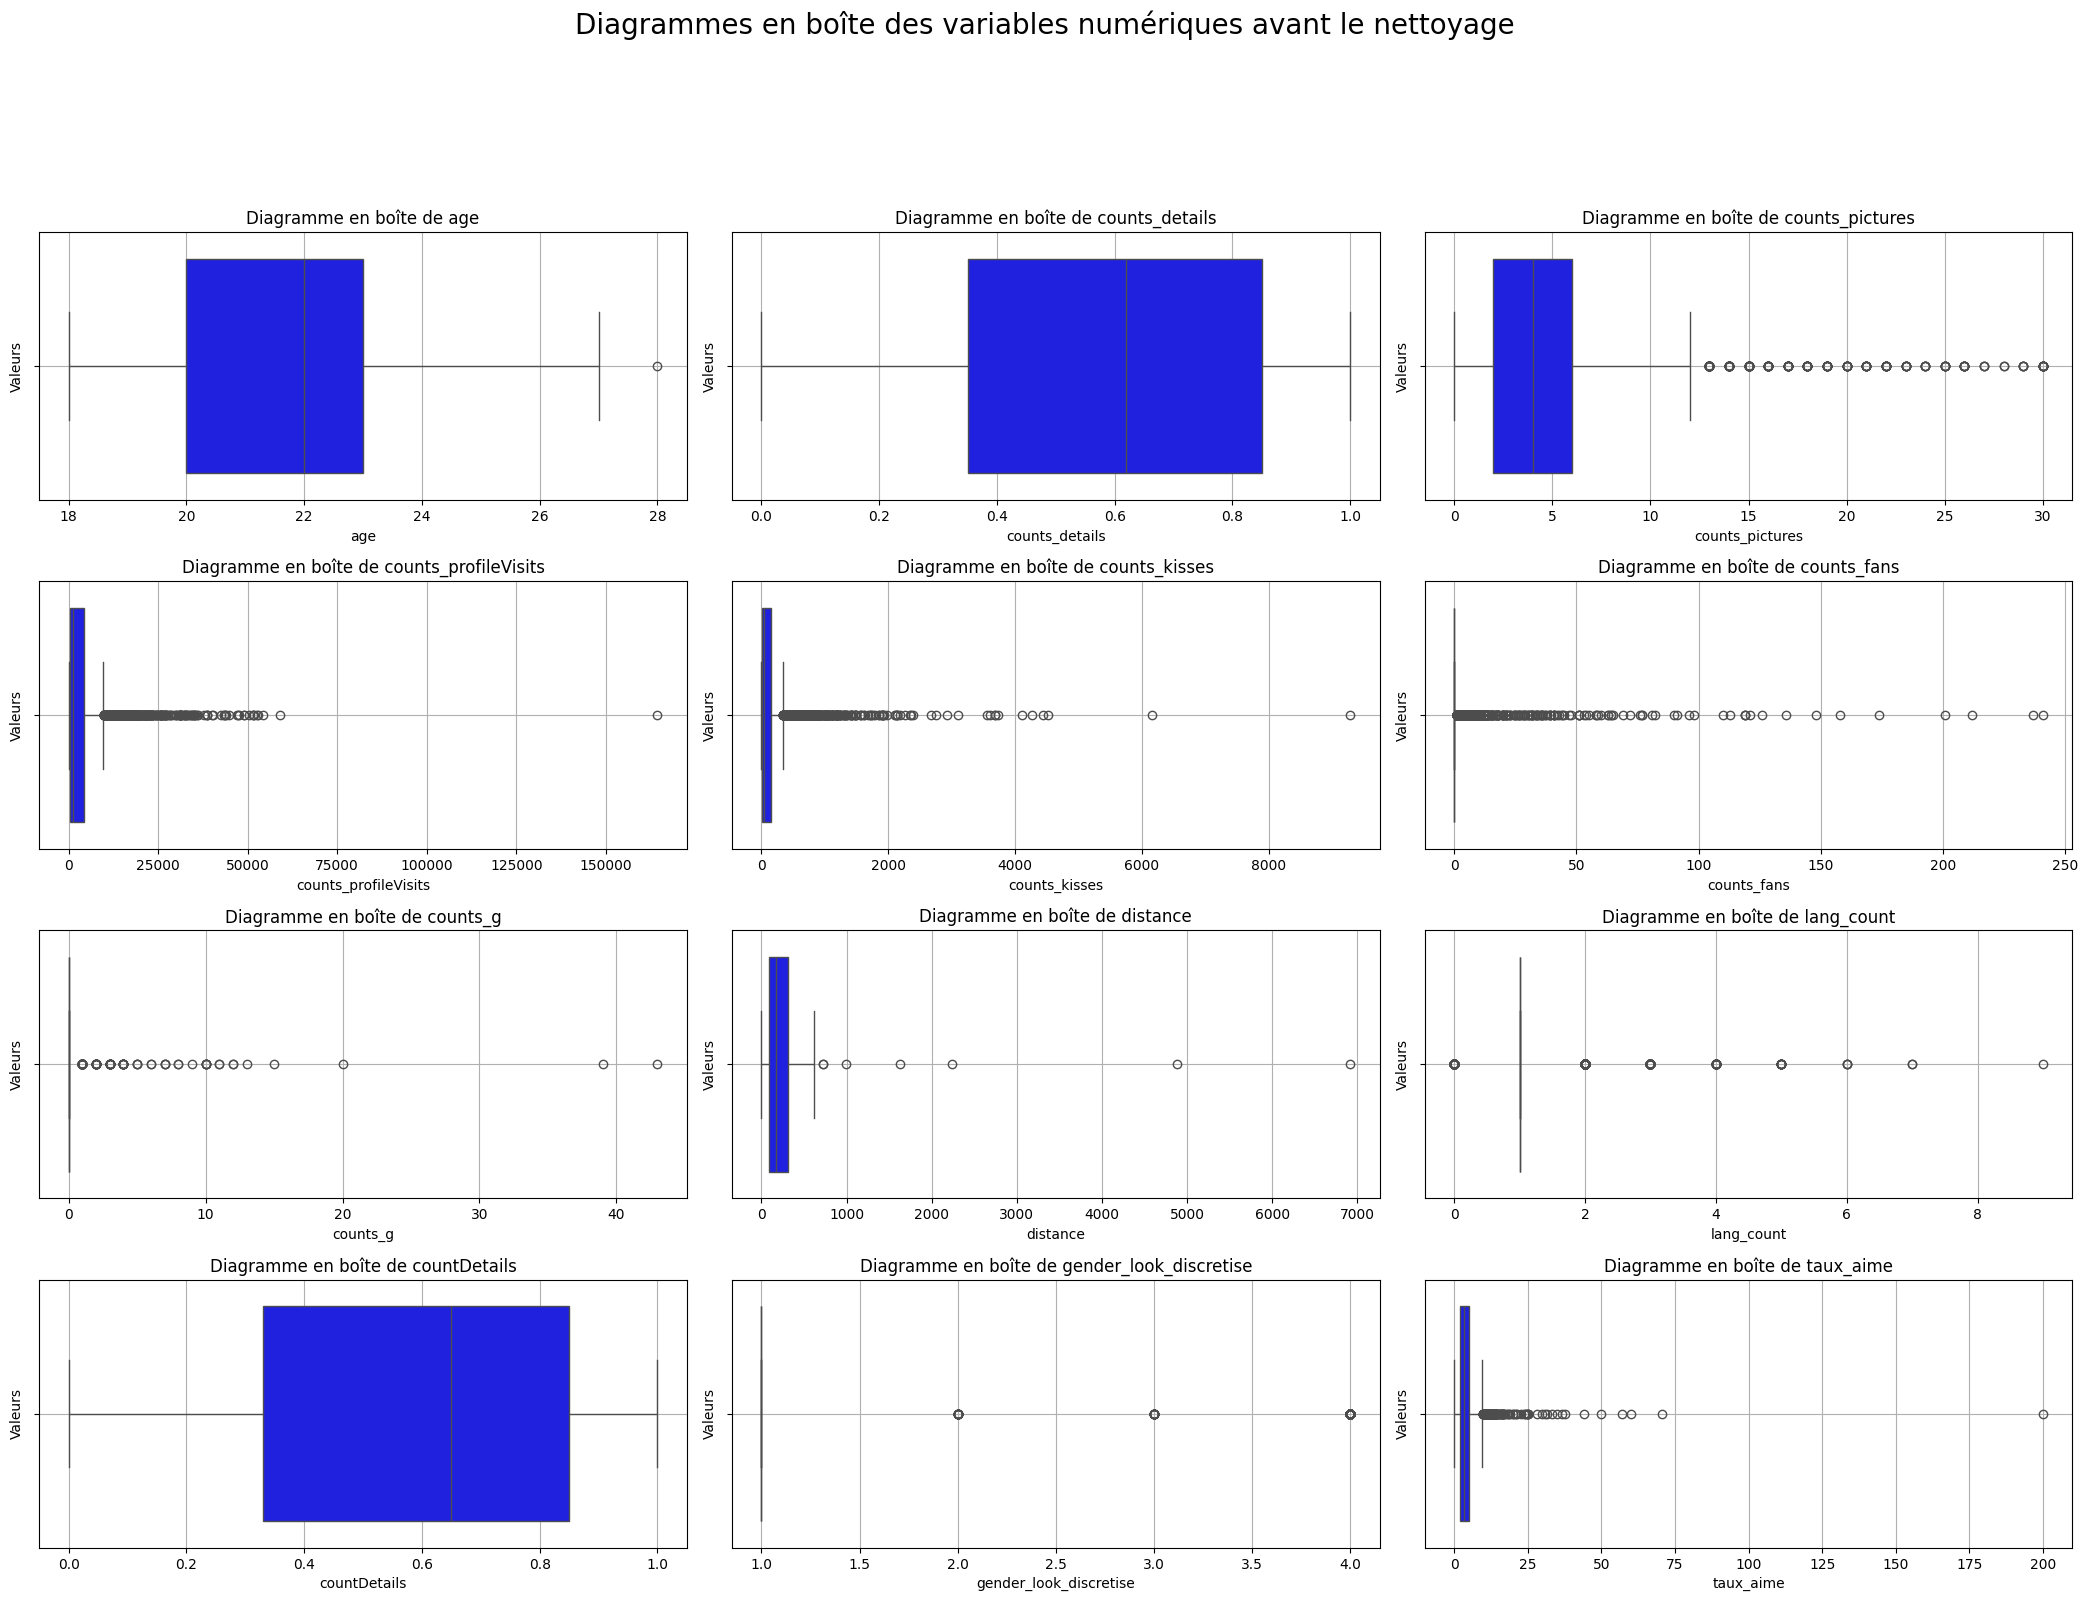

In [782]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour afficher les diagrammes en boîte des variables numériques, en excluant certaines colonnes spécifiques
def afficher_diagrammes_de_boite(dataset, titre):
    # Sélection des colonnes numériques, en excluant les binaires et 'gender_discretise'
    colonnes_numeriques = dataset.select_dtypes(include=['int64', 'float64']).columns[:60]
    colonnes_a_exclure = ['gender_discretise', 'crypt', 'lastOnlineTime', 'lastOnlineTs', 'isInfluencer', 'isSystemProfile']  # Colonnes supplémentaires à exclure
    
    for col in colonnes_numeriques:
        if dataset[col].nunique() == 2 and set(dataset[col].unique()) == {0, 1}:
            colonnes_a_exclure.append(col)
    
    colonnes_numeriques = [col for col in colonnes_numeriques if col not in colonnes_a_exclure]
    
    # Ajustement de la taille de la figure pour les diagrammes en boîte
    plt.figure(figsize=(21, 70))
    plt.suptitle(titre, y=1.02, fontsize=20)
    
    # Itération sur chaque colonne numérique sélectionnée du dataset
    for i, col in enumerate(colonnes_numeriques):
        ax = plt.subplot(20, 3, i + 1)
        
        # Dessiner le diagramme en boîte
        try:
            sns.boxplot(x=dataset[col], ax=ax, color='blue')
            plt.title(f'Diagramme en boîte de {col}', fontsize=12)
            plt.xlabel(col, fontsize=10)
            plt.ylabel('Valeurs', fontsize=10)
            plt.grid(True)
        except Exception as e:
            print(f'Erreur lors du tracé de {col}: {str(e)}')
            continue

    plt.tight_layout()
    plt.show()

# Utilisation avec l'ensemble de données
afficher_diagrammes_de_boite(dataset, "Diagrammes en boîte des variables numériques avant le nettoyage")



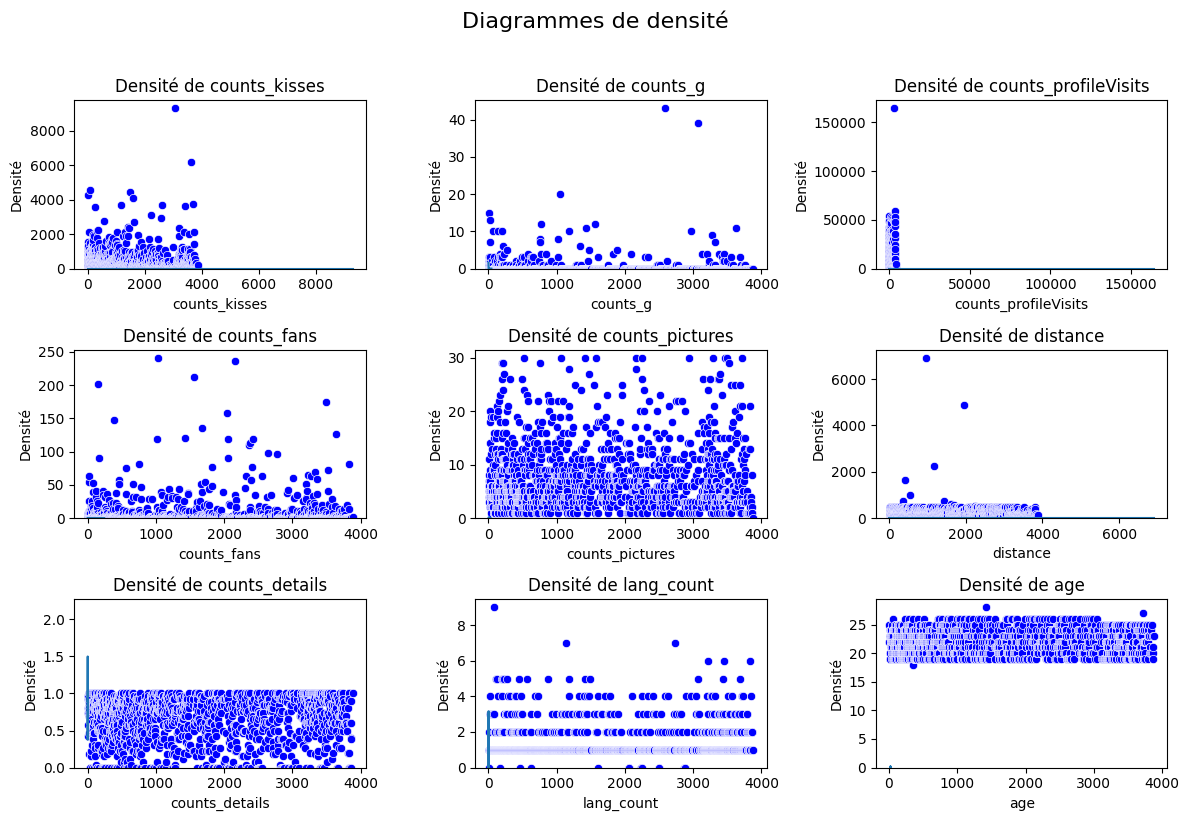

In [783]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Fonction pour tracer la densité et détecter les outliers avec DBSCAN pour des colonnes spécifiques
def tracer_densite_et_detecter_outliers(dataset):
    # Sélectionner uniquement les colonnes spécifiques pour l'analyse
    colonnes_selectionnees = ['counts_kisses', 'counts_g', 'counts_profileVisits', 'counts_fans', 
                              'counts_pictures', 'distance', 'counts_details', 'lang_count', 'age']
       
    colonnes = dataset[colonnes_selectionnees]
    
    # Mettre à l'échelle les données
    scaler = StandardScaler()
    dataset_scale = scaler.fit_transform(colonnes)
    
    # Appliquer DBSCAN
    eps = 0.5  # Rayon maximum entre les points pour être considérés comme voisins
    min_samples = 5  # Nombre minimum de points pour former un cluster
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(dataset_scale)
    
    # Configuration de la taille de la figure
    plt.figure(figsize=(12, 8))
    
    # Itérer sur chaque colonne numérique et tracer la densité
    for i, col in enumerate(colonnes.columns):
        plt.subplot(3, 3, i + 1)  # Ajuster selon le nombre de colonnes numériques
        sns.histplot(dataset[col], kde=True, stat='density', linewidth=0)  # Utiliser linewidth=0 pour les points
        plt.title(f'Densité de {col}')
        plt.xlabel(col)
        plt.ylabel('Densité')
        
        # Mettre en évidence les outliers détectés par DBSCAN (valeurs -1) avec des points bleus
        masque_outliers = clusters == -1
        sns.scatterplot(x=dataset[col][masque_outliers].index, y=dataset[col][masque_outliers], color='blue')
    
    # Ajouter un titre global au dessus de tous les sous-graphiques
    plt.suptitle('Diagrammes de densité', fontsize=16, y=1.02)
    
    plt.tight_layout()
    plt.show()

# Utilisation : Tracer la densité et détecter les outliers avec DBSCAN pour des colonnes spécifiques
tracer_densite_et_detecter_outliers(dataset)


In [784]:
import pandas as pd
import numpy as np

# Convertir le dictionnaire en DataFrame
dataset = pd.DataFrame(dataset)

# Filtrer les lignes où counts_kisses est inférieur ou égal à counts_profileVisits
dataset = dataset[dataset['counts_kisses'] <= dataset['counts_profileVisits']]

def remove_outliers(df, col_name, lower_quantile, upper_quantile):
    # Calculer les percentiles spécifiques pour chaque variable
    lower_percentile = df[col_name].quantile(lower_quantile)
    upper_percentile = df[col_name].quantile(upper_quantile)
    
    # Calculer la plage inter-percentile (PIP)
    PIP = upper_percentile - lower_percentile
    
    # Calculer les limites inférieure et supérieure pour identifier les valeurs aberrantes
    lower_limit = lower_percentile - 1.5 * PIP
    upper_limit = upper_percentile + 1.5 * PIP
    
    # Filtrer le DataFrame d'origine pour supprimer les valeurs aberrantes
    df_filtered = df[(df[col_name] >= lower_limit) & (df[col_name] <= upper_limit)]
    
    return df_filtered

# Appliquer la fonction remove_outliers avec différents percentiles pour chaque variable
dataset = remove_outliers(dataset, 'counts_kisses', lower_quantile=0.15, upper_quantile=0.85)
dataset = remove_outliers(dataset, 'counts_profileVisits', lower_quantile=0.10, upper_quantile=0.90)
dataset = remove_outliers(dataset, 'counts_fans', lower_quantile=0.10, upper_quantile=0.90)
dataset = remove_outliers(dataset, 'counts_pictures', lower_quantile=0.10, upper_quantile=0.90)
dataset = remove_outliers(dataset, 'distance', lower_quantile=0.15, upper_quantile=0.85)
dataset = remove_outliers(dataset, 'lang_count', lower_quantile=0.05, upper_quantile=0.95)




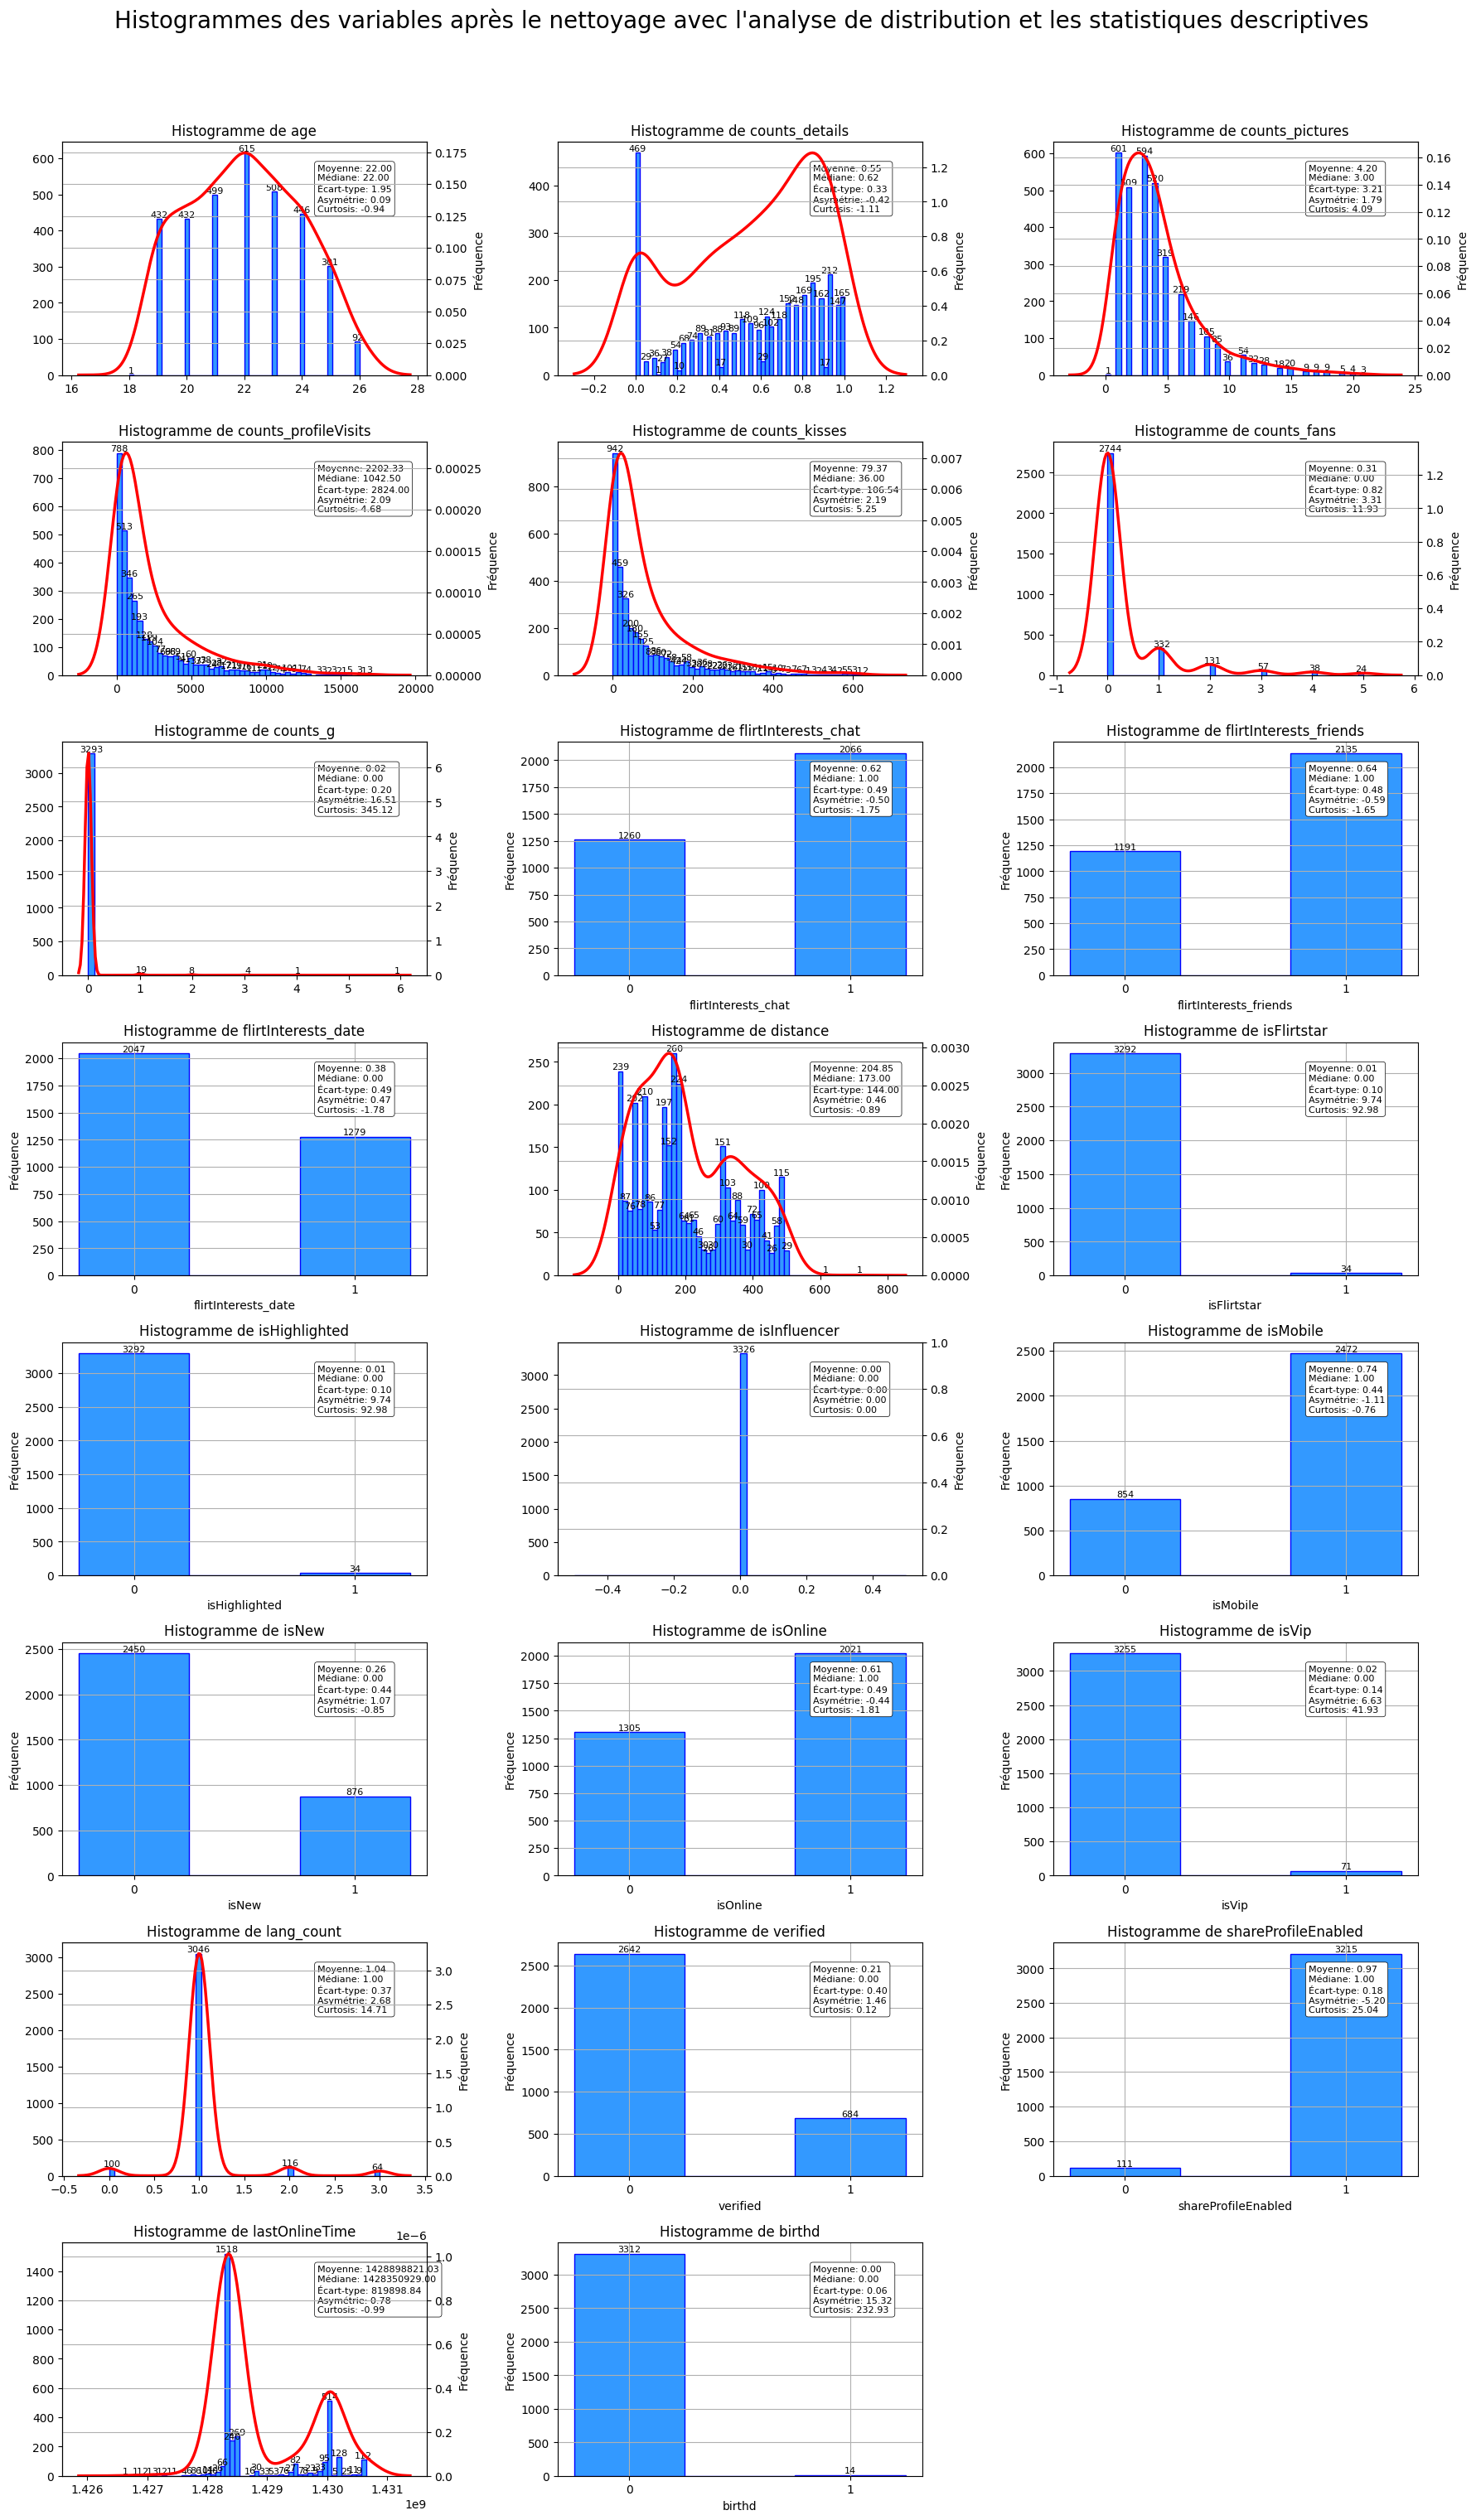

In [785]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def afficher_histogrammes_analyse(dataset, titre):
    # Sélectionner les colonnes numériques, exclure 'crypt' et 'isOnline'
    colonnes_numeriques = dataset.select_dtypes(include=['int64', 'float64']).columns[:25]
    colonnes_a_exclure = ['crypt', 'isSystemProfile']
    colonnes_numeriques = [col for col in colonnes_numeriques if col not in colonnes_a_exclure]
    
    # Ajuster la taille de la figure pour afficher les histogrammes
    plt.figure(figsize=(18, 40))
    plt.suptitle(titre, y=1.02, fontsize=20)
    
    # Itérer sur chaque colonne sélectionnée du dataset
    for i, col in enumerate(colonnes_numeriques):
        # Créer un subplot pour chaque histogramme
        ax = plt.subplot(11, 3, i + 1)
        
        # Vérifier si la colonne est binaire (0 ou 1)
        if dataset[col].nunique() == 2 and set(dataset[col].unique()) == {0, 1}:
            # Supprimer les NaN et vérifier que les valeurs sont 0 ou 1
            data = dataset[col].dropna()
            if set(data.unique()) != {0, 1}:
                continue  # Passe à la prochaine colonne si les valeurs ne sont pas binaires exactement
            
            # Dessiner l'histogramme avec des barres bleues
            counts, bins, _ = ax.hist(data, bins=[-0.25, 0.25, 0.75, 1.25], color='#3399FF', edgecolor='blue', align='mid')
            plt.xticks([0, 1], ['0', '1'])  # Étiqueter l'axe des x avec 0 et 1
            
            # Ajouter une analyse de la distribution
            mean = data.mean()
            median = data.median()
            std_dev = data.std()
            skewness = data.skew()
            kurtosis = data.kurtosis()
            
            ax.annotate(f'Moyenne: {mean:.2f}\nMédiane: {median:.2f}\nÉcart-type: {std_dev:.2f}\nAsymétrie: {skewness:.2f}\nCurtosis: {kurtosis:.2f}',
                        xy=(0.7, 0.7), xycoords='axes fraction', fontsize=8, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5))
            
        else:
            # Supprimer les NaN et dessiner l'histogramme avec des barres bleues
            data = dataset[col].dropna()
            counts, bins, _ = ax.hist(data, bins=50, color='#3399FF', edgecolor='blue')
            
            # Ajouter une analyse de la distribution
            mean = data.mean()
            median = data.median()
            std_dev = data.std()
            skewness = data.skew()
            kurtosis = data.kurtosis()
            
            ax.annotate(f'Moyenne: {mean:.2f}\nMédiane: {median:.2f}\nÉcart-type: {std_dev:.2f}\nAsymétrie: {skewness:.2f}\nCurtosis: {kurtosis:.2f}',
                        xy=(0.7, 0.7), xycoords='axes fraction', fontsize=8, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5))
            
            # Tracer le graphique de densité avec suppression du warning pour la variance nulle
            sns.kdeplot(data, ax=ax.twinx(), color='red', linewidth=2.5, bw_method=0.3, warn_singular=False)
        
        plt.title(f'Histogramme de {col}', fontsize=12)
        plt.xlabel(col, fontsize=10)
        plt.ylabel('Fréquence', fontsize=10)
        plt.grid(True)
        
        # Afficher le total de chaque barre au sommet (uniquement si ce n'est pas zéro)
        for count, x in zip(counts, bins):
            if count != 0:
                ax.text(x + (bins[1] - bins[0]) / 2, count + 0.5, int(count), ha='center', va='bottom', fontsize=8, color='black')
    
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation avec votre ensemble de données
# Supposons que `dataset` est votre DataFrame nettoyé sans NaNs
afficher_histogrammes_analyse(dataset, "Histogrammes des variables après le nettoyage avec l'analyse de distribution et les statistiques descriptives")


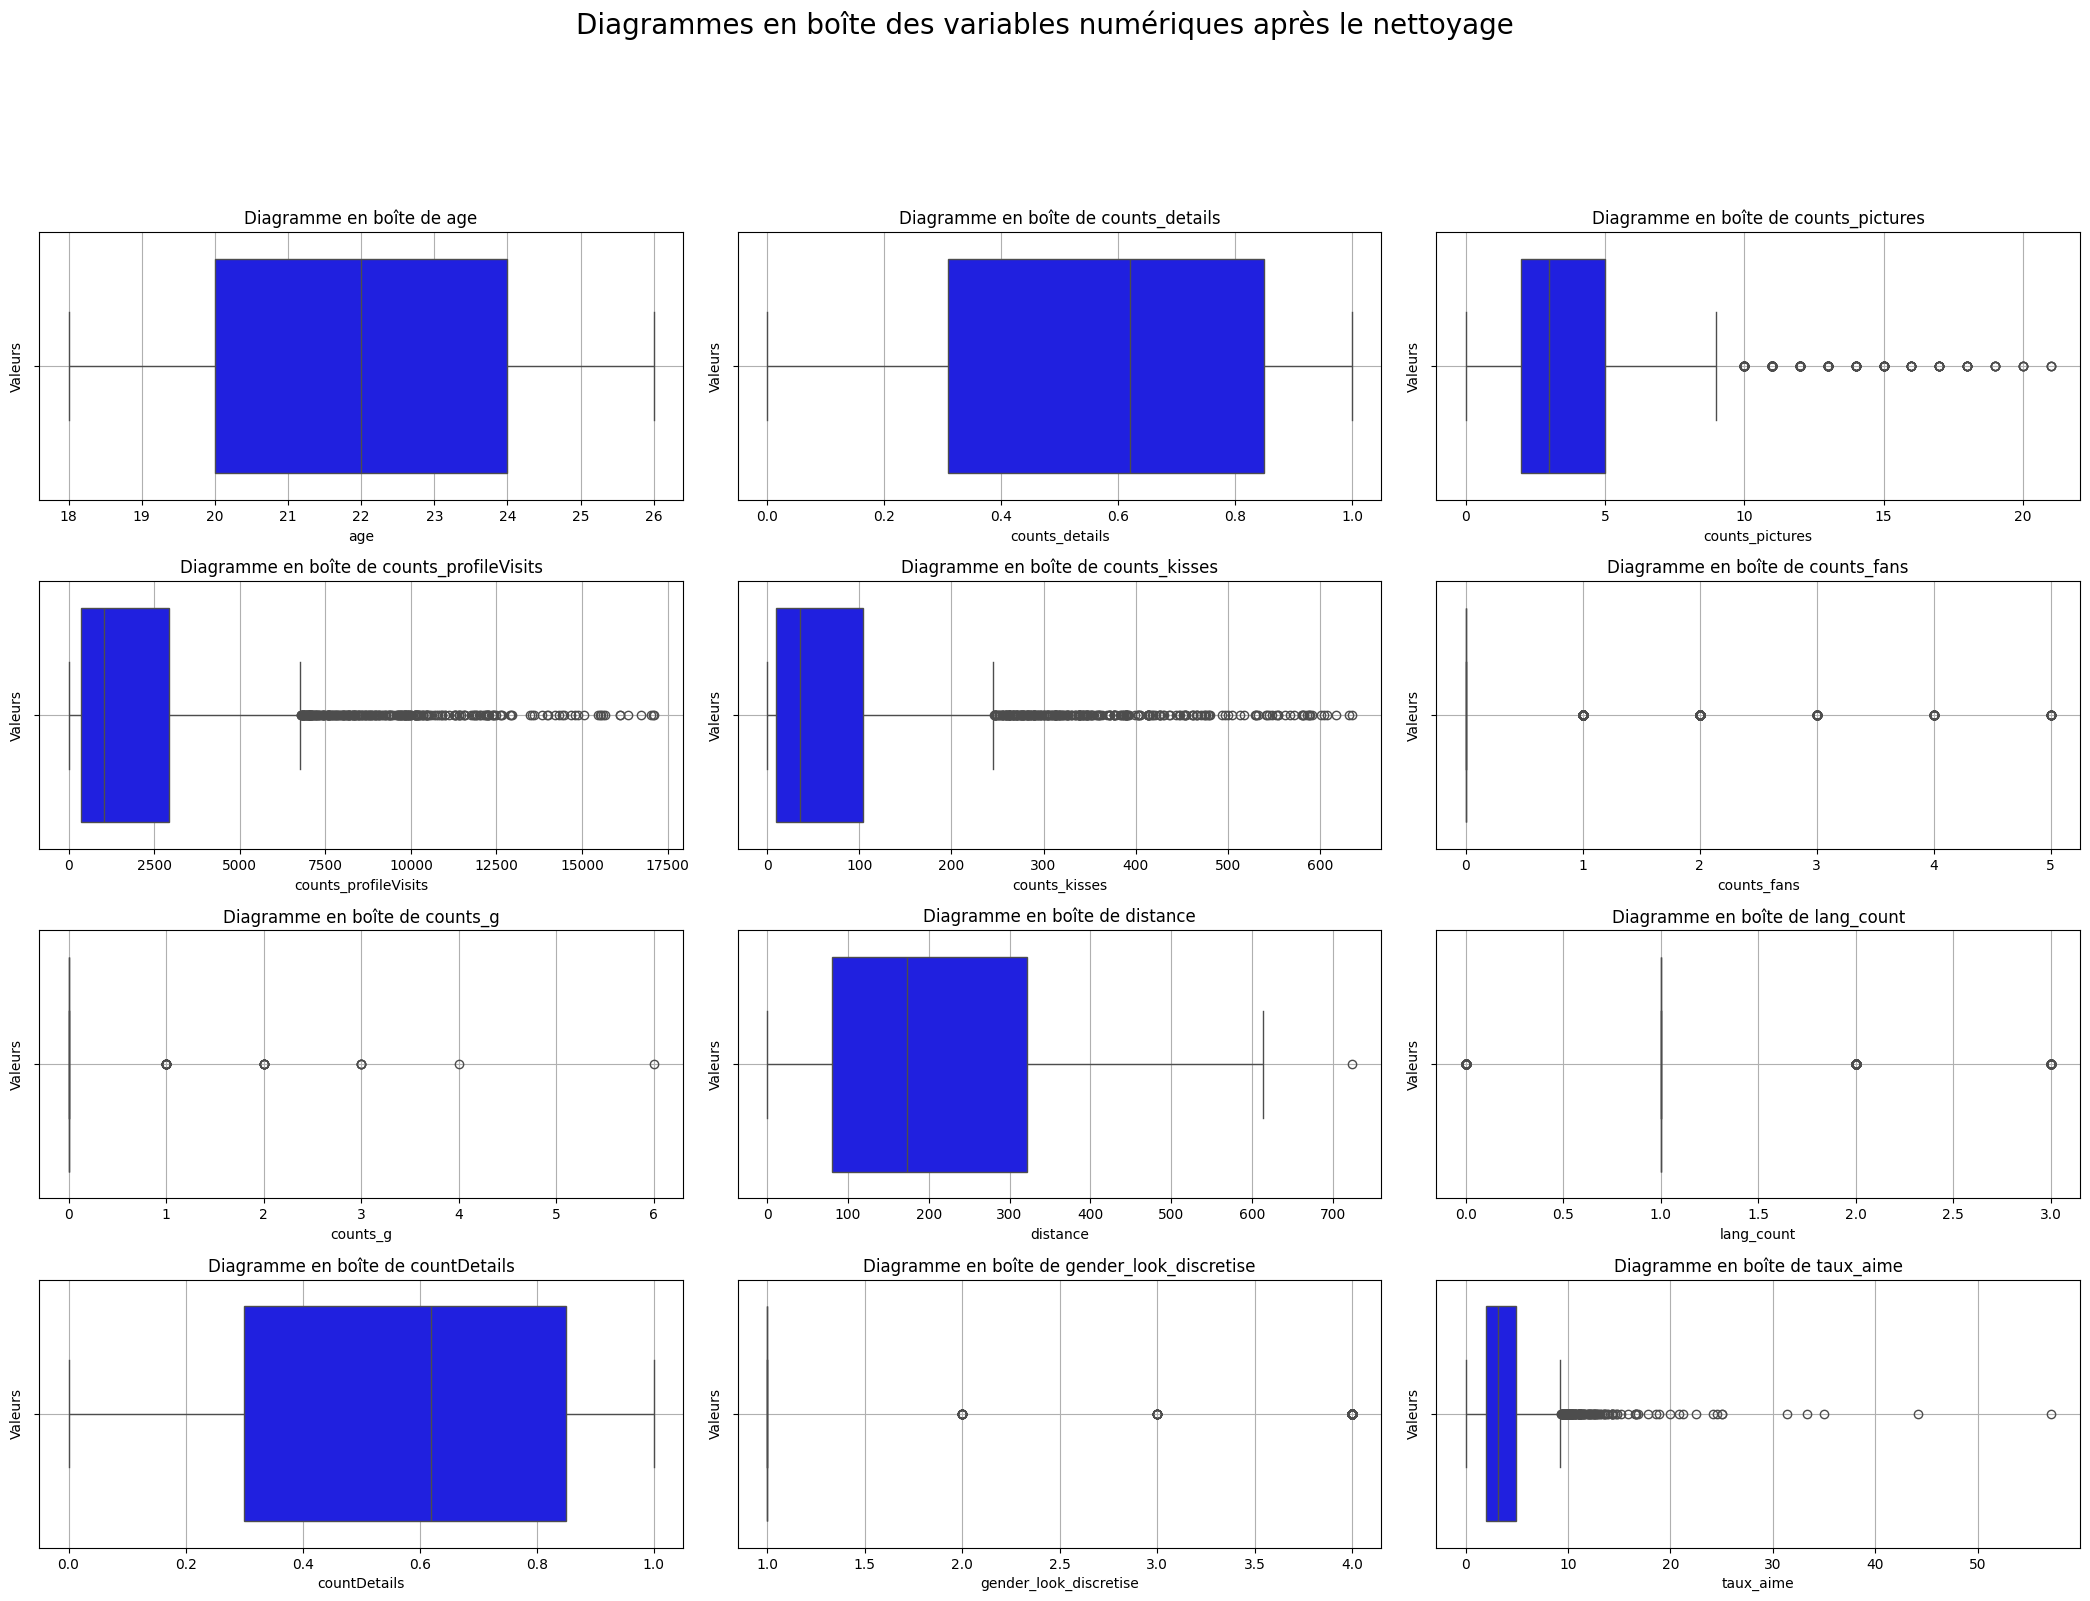

In [786]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour afficher les diagrammes en boîte des variables numériques, en excluant certaines colonnes spécifiques
def afficher_diagrammes_de_boite(dataset, titre):
    # Sélection des colonnes numériques, en excluant les binaires et 'gender_discretise'
    colonnes_numeriques = dataset.select_dtypes(include=['int64', 'float64']).columns[:60]
    colonnes_a_exclure = ['gender_discretise', 'crypt', 'lastOnlineTime', 'lastOnlineTs', 'isInfluencer', 'isSystemProfile']  # Colonnes supplémentaires à exclure
    
    for col in colonnes_numeriques:
        if dataset[col].nunique() == 2 and set(dataset[col].unique()) == {0, 1}:
            colonnes_a_exclure.append(col)
    
    colonnes_numeriques = [col for col in colonnes_numeriques if col not in colonnes_a_exclure]
    
    # Ajustement de la taille de la figure pour les diagrammes en boîte
    plt.figure(figsize=(21, 70))
    plt.suptitle(titre, y=1.02, fontsize=20)
    
    # Itération sur chaque colonne numérique sélectionnée du dataset
    for i, col in enumerate(colonnes_numeriques):
        ax = plt.subplot(20, 3, i + 1)
        
        # Dessiner le diagramme en boîte
        try:
            sns.boxplot(x=dataset[col], ax=ax, color='blue')
            plt.title(f'Diagramme en boîte de {col}', fontsize=12)
            plt.xlabel(col, fontsize=10)
            plt.ylabel('Valeurs', fontsize=10)
            plt.grid(True)
        except Exception as e:
            print(f'Erreur lors du tracé de {col}: {str(e)}')
            continue

    plt.tight_layout()
    plt.show()

# Utilisation avec l'ensemble de données
afficher_diagrammes_de_boite(dataset, "Diagrammes en boîte des variables numériques après le nettoyage")


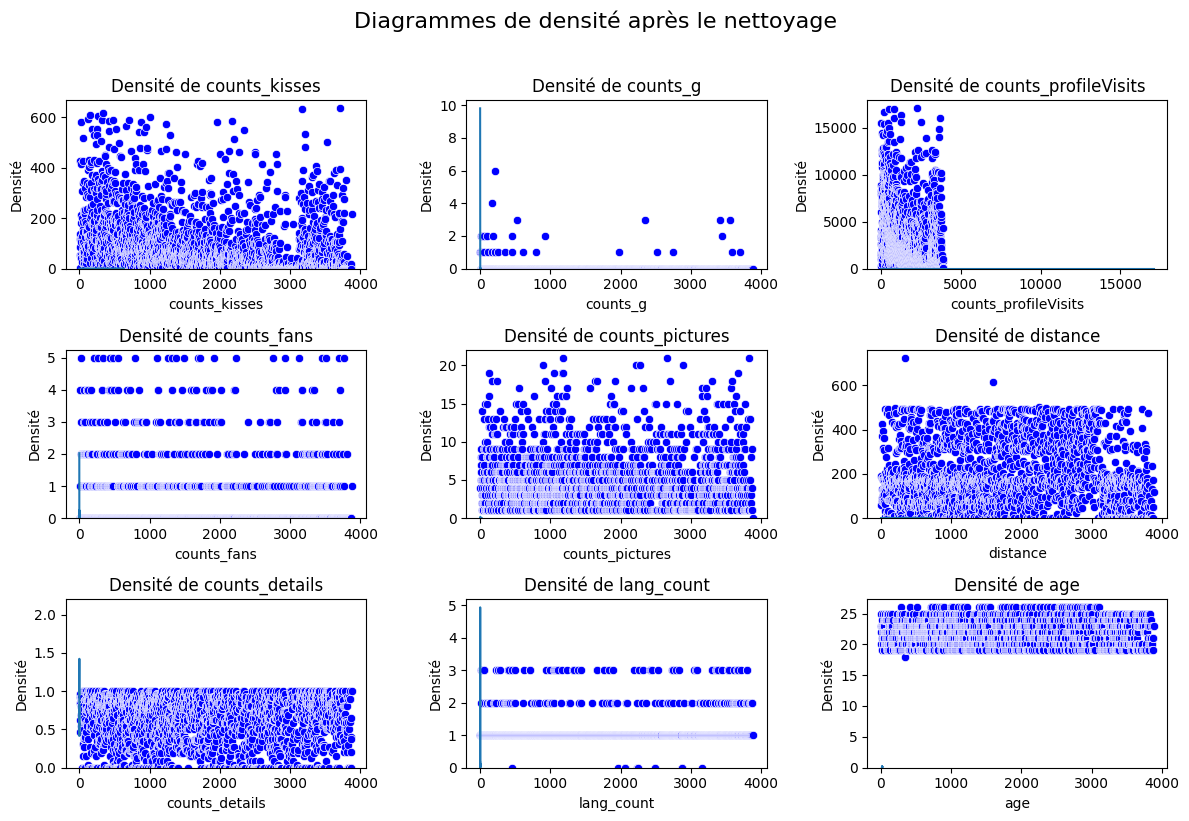

In [787]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Fonction pour tracer la densité et détecter les outliers avec DBSCAN pour des colonnes spécifiques
def tracer_densite_et_detecter_outliers(dataset):
    # Sélectionner uniquement les colonnes spécifiques pour l'analyse
    colonnes_selectionnees = ['counts_kisses', 'counts_g', 'counts_profileVisits', 'counts_fans', 
                              'counts_pictures', 'distance', 'counts_details', 'lang_count', 'age']
       
    colonnes = dataset[colonnes_selectionnees]
    
    # Mettre à l'échelle les données
    scaler = StandardScaler()
    dataset_scale = scaler.fit_transform(colonnes)
    
    # Appliquer DBSCAN
    eps = 0.5  # Rayon maximum entre les points pour être considérés comme voisins
    min_samples = 5  # Nombre minimum de points pour former un cluster
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(dataset_scale)
    
    # Configuration de la taille de la figure
    plt.figure(figsize=(12, 8))
    
    # Itérer sur chaque colonne numérique et tracer la densité
    for i, col in enumerate(colonnes.columns):
        plt.subplot(3, 3, i + 1)  # Ajuster selon le nombre de colonnes numériques
        sns.histplot(dataset[col], kde=True, stat='density', linewidth=0)  # Utiliser linewidth=0 pour les points
        plt.title(f'Densité de {col}')
        plt.xlabel(col)
        plt.ylabel('Densité')
        
        # Mettre en évidence les outliers détectés par DBSCAN (valeurs -1) avec des points bleus
        masque_outliers = clusters == -1
        sns.scatterplot(x=dataset[col][masque_outliers].index, y=dataset[col][masque_outliers], color='blue')
    
    # Ajouter un titre global au dessus de tous les sous-graphiques
    plt.suptitle('Diagrammes de densité après le nettoyage', fontsize=16, y=1.02)
    
    plt.tight_layout()
    plt.show()

# Utilisation : Tracer la densité et détecter les outliers avec DBSCAN pour des colonnes spécifiques
tracer_densite_et_detecter_outliers(dataset)


In [788]:
# NORMALISATION

# Normaliser la colonne counts_profileVisits
dataset['norm_visites'] = (dataset['counts_profileVisits'] / dataset['counts_profileVisits'].max()).round(3)

# Normaliser la colonne counts_kisses
dataset['norm_kisses'] = (dataset['counts_kisses'] / dataset['counts_kisses'].max()).round(3)

# Normaliser la colonne counts_details
dataset['norm_pictures'] = (dataset['counts_pictures'] / dataset['counts_pictures'].max()).round(3)

# Normaliser la colonne counts_fans
dataset['norm_fans'] = (dataset['counts_fans'] / dataset['counts_fans'].max()).round(3)

# Normaliser la colonne counts_g
dataset['norm_counts_g'] = (dataset['counts_g'] / dataset['counts_g'].max()).round(3)

# Normaliser la colonne distance
dataset['norm_distance'] = (dataset['distance'] / dataset['distance'].max()).round(3)

# Normaliser la colonne lang_count
dataset['norm_lang_count'] = (dataset['lang_count'] / dataset['lang_count'].max()).round(3)

# Normaliser la colonne age
dataset['norm_age'] = (dataset['age'] / dataset['age'].max()).round(3)




Matrice de corrélation sous forme de heatmap


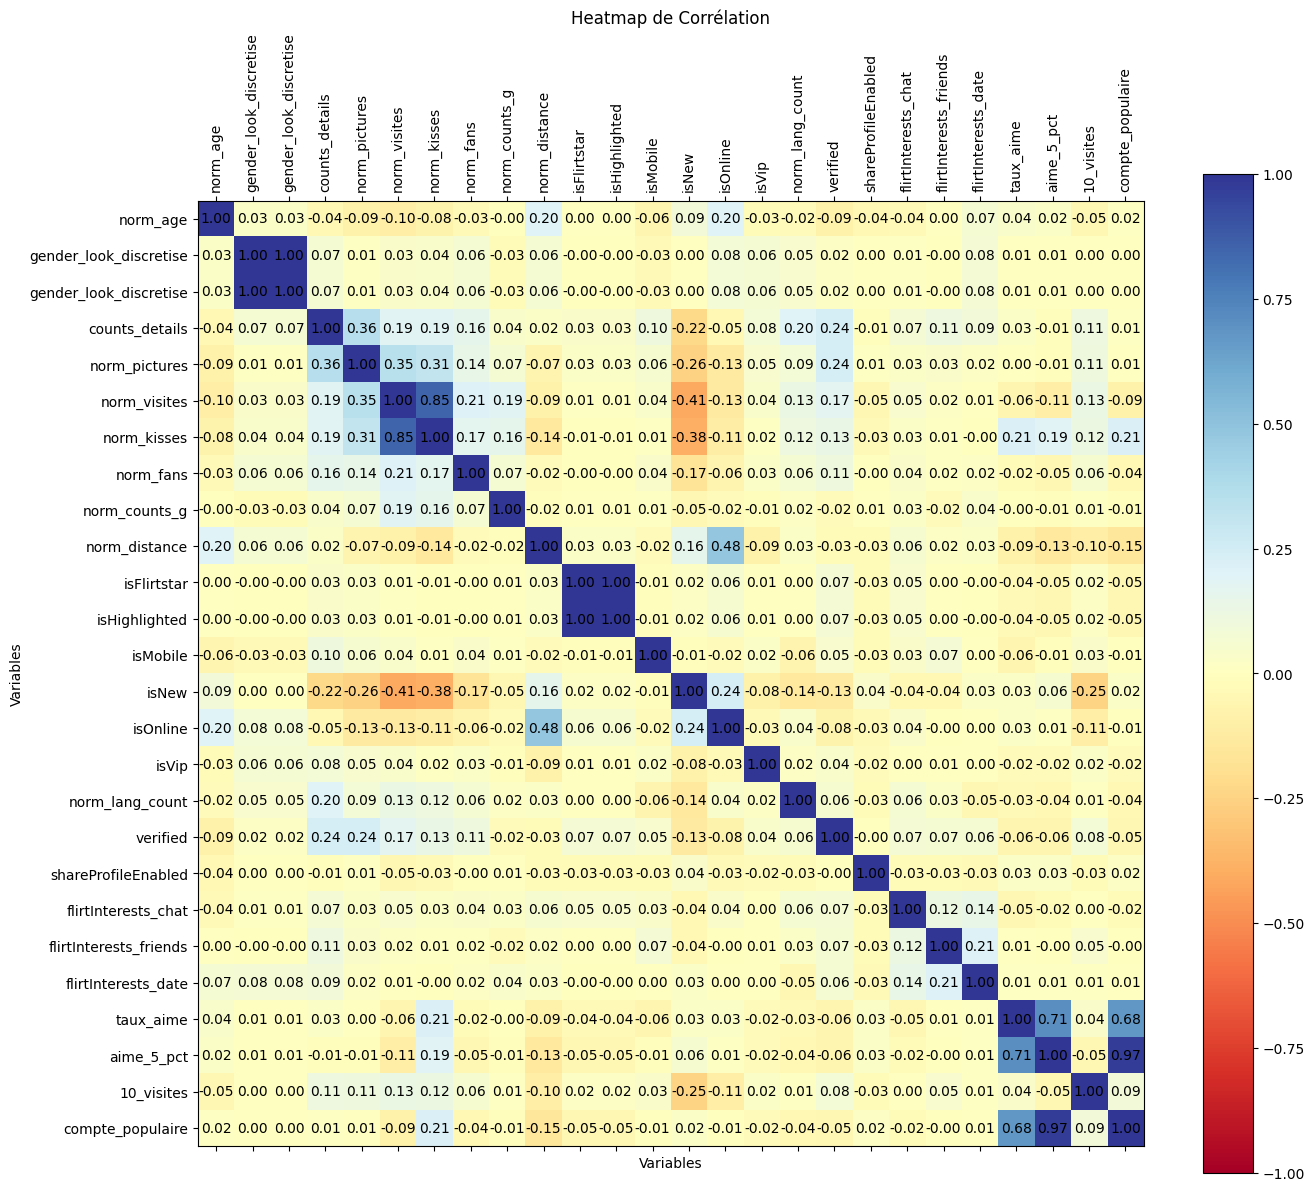

In [789]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Définir les options d'affichage pour montrer toutes les colonnes
pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes

def printCorrelationHeatMap(dataset):
    # Sélectionner uniquement les colonnes numériques
    
    # Spécifier les colonnes numériques que vous voulez inclure
    colonnes = ['norm_age',  'gender_look_discretise', 'gender_look_discretise', 
                'counts_details', 'norm_pictures', 'norm_visites', 
                'norm_kisses', 'norm_fans', 'norm_counts_g', 'norm_distance', 
                'isFlirtstar', 'isHighlighted', 'isMobile', 'isNew', 'isOnline', 
                'isVip', 'norm_lang_count', 'verified', 'shareProfileEnabled',
                'flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date', 
                'taux_aime', 'aime_5_pct', '10_visites', 'compte_populaire']      
      
    # Créer un nouveau DataFrame avec seulement les colonnes spécifiées
    df_numeric = dataset[colonnes]
    
    # Calculer la matrice de corrélation
    corr_matrix = df_numeric.corr()
    
    print("\nMatrice de corrélation sous forme de heatmap")
    fig = plt.figure(figsize=(14, 12))  # Ajuster la taille de la figure selon les besoins
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr_matrix, cmap='RdYlBu', vmin=-1, vmax=1)  # Colormap 'RdYlBu' pour une meilleure visualisation
    fig.colorbar(cax)
    
    # Configurer les étiquettes des axes x et y
    ax.set_xticks(np.arange(len(corr_matrix.columns)))
    ax.set_yticks(np.arange(len(corr_matrix.columns)))
    
    # Faire pivoter les étiquettes de l'axe x verticalement
    ax.set_xticklabels(corr_matrix.columns, rotation=90)
    ax.set_yticklabels(corr_matrix.columns)
    
    plt.xlabel('Variables')  # Étiquette de l'axe x
    plt.ylabel('Variables')  # Étiquette de l'axe y
    plt.title('Heatmap de Corrélation')  # Titre du heatmap
    
    # Afficher les valeurs de corrélation dans chaque cellule
    for i in range(len(corr_matrix.columns)):
        for j in range(len(corr_matrix.columns)):
            text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')
    
    plt.tight_layout()  # Ajuster la disposition pour éviter que les étiquettes ne soient coupées
    plt.show()

# Créer une heatmap de corrélation pour toutes les variables numériques
printCorrelationHeatMap(dataset)



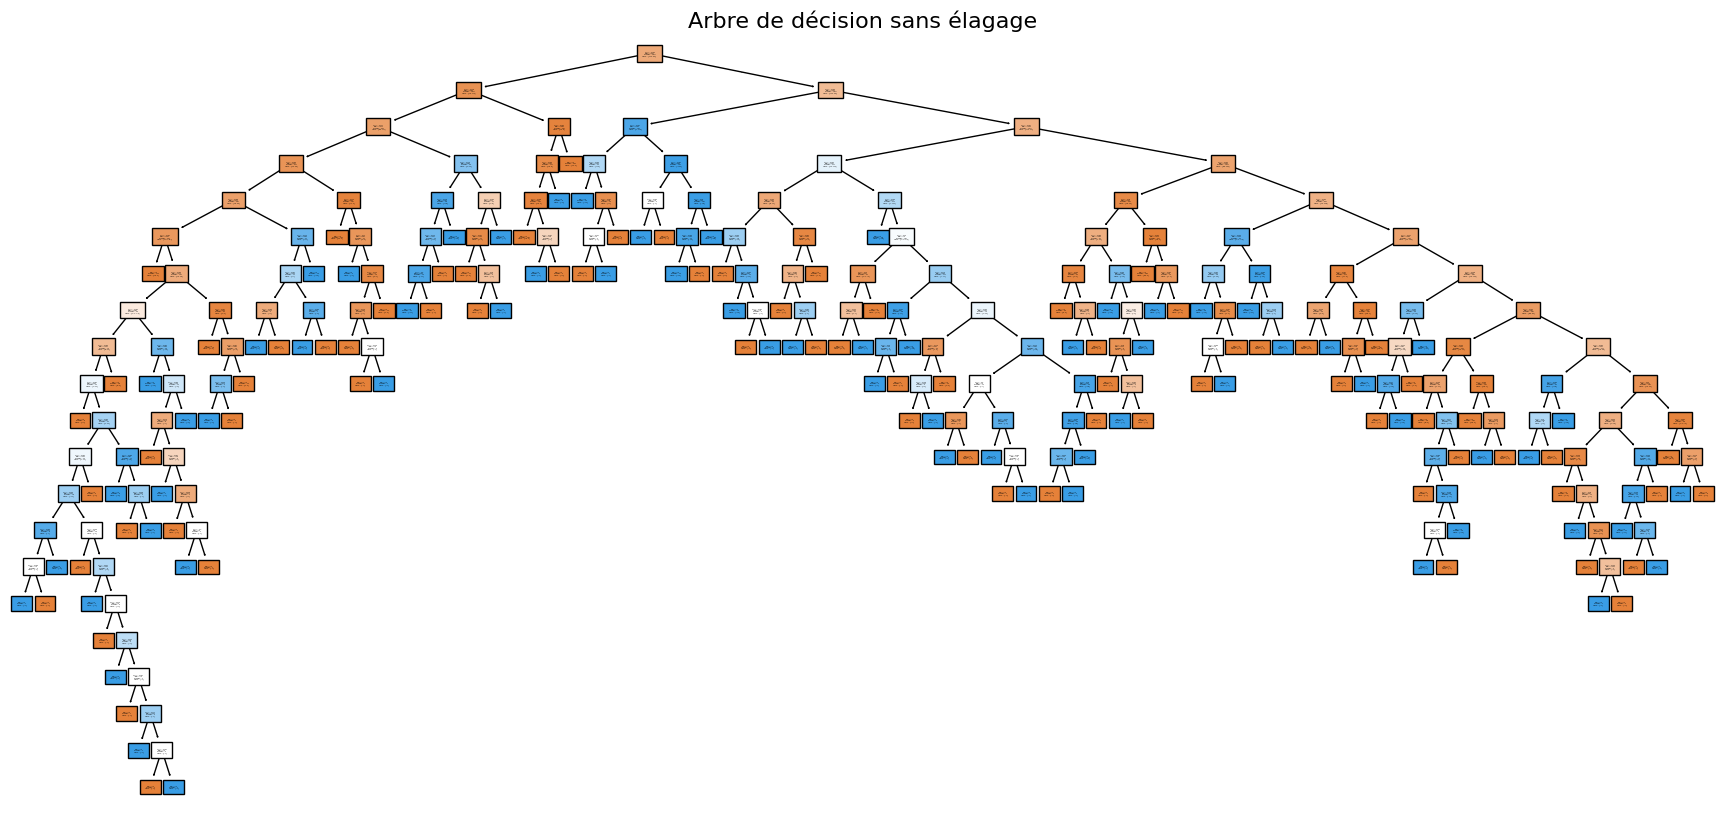

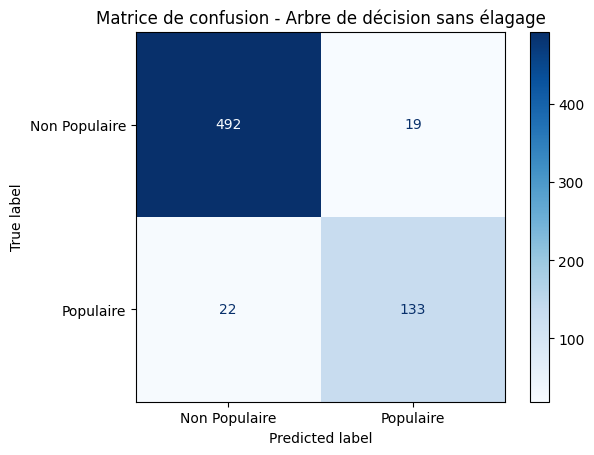

Précision du modèle sur l'ensemble de test: 0.94


In [790]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix

# Fonction pour diviser les données en ensemble d'entraînement et ensemble de test
def diviserDonnees(data):
    train, test = train_test_split(data, train_size=0.8, test_size=0.2, random_state=39)
    return train, test

# Fonction pour sélectionner des caractéristiques spécifiques pour X et Y
def selectionnerCaracteristiques(dataset, feature_cols=None, target_col='compte_populaire'):
    if feature_cols is None:
        feature_cols = dataset.columns.drop(target_col)
    X = dataset[feature_cols]  # Caractéristiques
    y = dataset[target_col]    # Variable cible
    return X, y

# Fonction pour afficher l'arbre de décision avec une taille de police de nœuds personnalisée
def afficherArbreDecision(arbre, titre):
    plt.figure(figsize=(22, 10))  # Taille de la figure
    plot_tree(arbre, filled=True, fontsize=1)  # Ajuster la taille de police à 1
    plt.title(titre, fontsize=16)
    plt.show()

# Fonction pour entraîner et retourner un arbre de décision sans limitation de profondeur
def arbreDecision(XTrain, YTrain, titre):
    clf = DecisionTreeClassifier()  # Sans limitation de profondeur
    clf = clf.fit(XTrain, YTrain)
    afficherArbreDecision(clf, titre)
    return clf

# Fonction pour générer et afficher la matrice de confusion
def matriceConfusionArbre(arbre, X_test, y_test):
    y_pred = arbre.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non Populaire', 'Populaire'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Matrice de confusion - Arbre de décision sans élagage")
    plt.show()
    precision = accuracy_score(y_test, y_pred)
    print(f'Précision du modèle sur l\'ensemble de test: {precision:.2f}')

if __name__ == "__main__":

    # Diviser les données en ensemble d'entraînement et ensemble de test
    TrainComplet, TestComplet = diviserDonnees(dataset)

    # Spécifier les colonnes pour X et Y
    colonnes_caracteristiques = ['norm_visites', 'norm_kisses', 'norm_distance', 'isHighlighted', 'verified']  # Colonnes à utiliser comme caractéristiques (X)
    colonne_cible = 'compte_populaire'                # Colonne à utiliser comme variable cible (y)

    # Obtenir X et y pour l'ensemble d'entraînement
    X_TrainComplet, Y_TrainComplet = selectionnerCaracteristiques(TrainComplet, feature_cols=colonnes_caracteristiques, target_col=colonne_cible)

    # Créer et entraîner l'arbre de décision sans limiter la profondeur
    ArbreComplet = arbreDecision(X_TrainComplet, Y_TrainComplet, "Arbre de décision sans élagage")

    # Afficher la matrice de confusion pour l'arbre avec l'ensemble de test complet
    matriceConfusionArbre(ArbreComplet, TestComplet[colonnes_caracteristiques], TestComplet[colonne_cible])


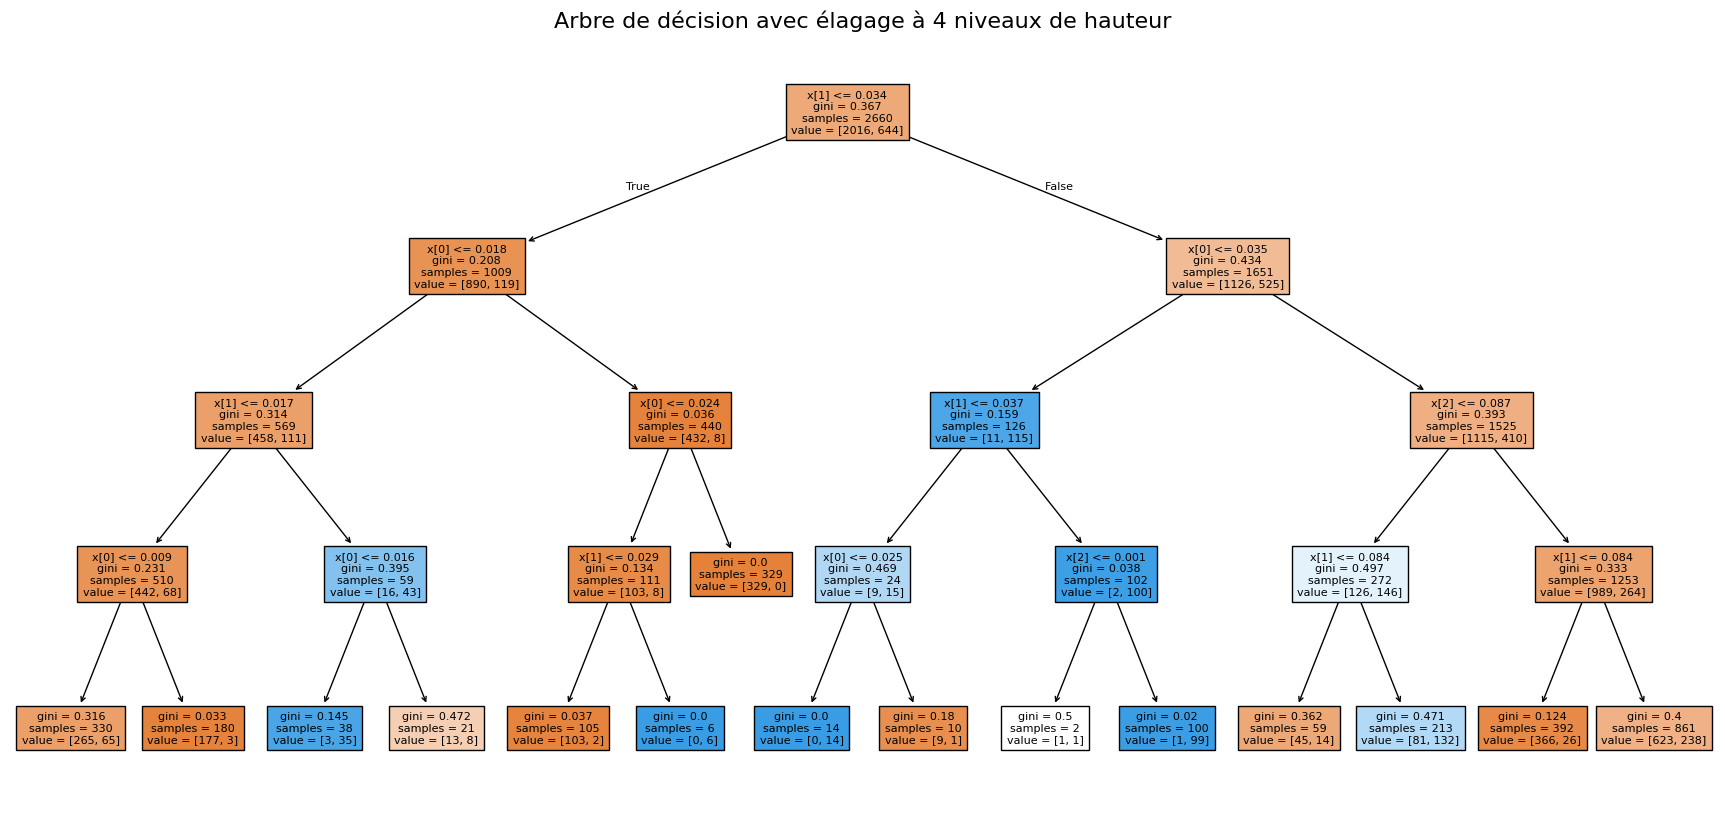

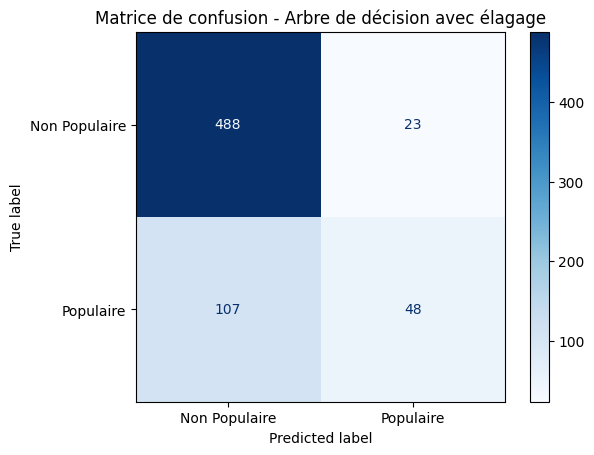

Précision du modèle sur l'ensemble de test: 0.80


In [798]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix

# Fonction pour diviser les données en ensemble d'entraînement et de test
def diviserDonnees(data):
    train, test = train_test_split(data, train_size=0.8, test_size=0.2, random_state=39)
    return train, test

# Fonction pour sélectionner des colonnes spécifiques pour X et Y
def selectionnerCaracteristiques(dataset, feature_cols=None, target_col='compte_populaire'):
    if feature_cols is None:
        feature_cols = dataset.columns.drop(target_col)
    X = dataset[feature_cols]  # Caractéristiques
    y = dataset[target_col]    # Variable cible
    return X, y

# Fonction pour afficher l'arbre de décision avec texte des nœuds plus grand
def afficherArbreDecision(arbre, titre):
    plt.figure(figsize=(22, 10))  # Réduire la taille de la figure
    plot_tree(arbre, filled=True, max_depth=4, fontsize=8)  # Ajuster le fontsize à 8
    plt.title(titre, fontsize=16)
    plt.show()

# Fonction pour entraîner et retourner un arbre de décision
def arbreDecision(XTrain, YTrain, titre, max_profondeur=None):
    clf = DecisionTreeClassifier(max_depth=max_profondeur)
    clf = clf.fit(XTrain, YTrain)
    afficherArbreDecision(clf, titre)
    return clf

# Fonction pour générer et afficher la matrice de confusion
def matriceConfusionArbre(arbre, X_test, y_test):
    y_pred = arbre.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non Populaire', 'Populaire'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Matrice de confusion - Arbre de décision avec élagage")
    plt.show()
    precision = accuracy_score(y_test, y_pred)
    print(f'Précision du modèle sur l\'ensemble de test: {precision:.2f}')

# Diviser les jeux de données en ensembles d'entraînement et de test
TrainComplet, TestComplet = diviserDonnees(dataset)

# Spécifier les colonnes pour X et Y
colonnes_caracteristiques = ['norm_visites', 'norm_kisses', 'norm_distance', 'isHighlighted', 'verified']  # Colonnes à utiliser comme caractéristiques (X)
colonne_cible = 'compte_populaire'                # Colonne à utiliser comme variable cible (y)

# Obtenir X et y pour l'ensemble d'entraînement
X_TrainComplet, Y_TrainComplet = selectionnerCaracteristiques(TrainComplet, feature_cols=colonnes_caracteristiques, target_col=colonne_cible)

# Créer et entraîner l'arbre de décision en limitant la profondeur maximale à 4
ArbreComplet = arbreDecision(X_TrainComplet, Y_TrainComplet, "Arbre de décision avec élagage à 4 niveaux de hauteur", max_profondeur=4)

# Afficher la matrice de confusion pour l'arbre avec l'ensemble de test complet
matriceConfusionArbre(ArbreComplet, TestComplet[colonnes_caracteristiques], TestComplet[colonne_cible])


Précision la plus élevée atteinte : 0.88 avec random_state=20


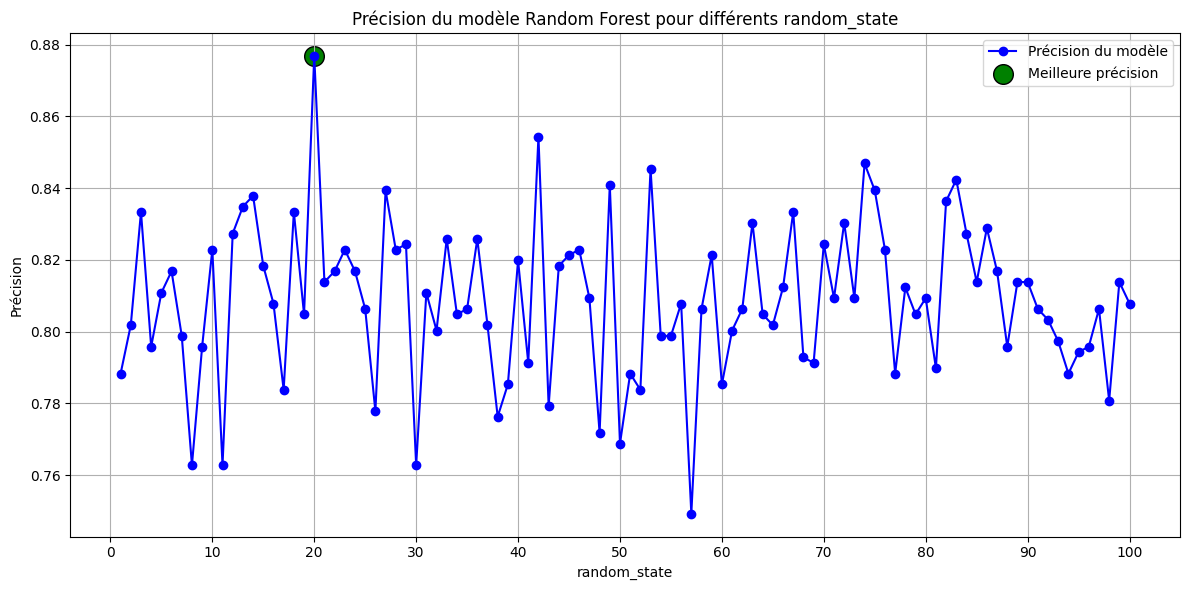

In [792]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Fonction pour entraîner le modèle Random Forest et obtenir la précision
def trainRandomForestAndGetAccuracy(X, y, random_state):
    # Diviser les données en ensemble d'entraînement et ensemble de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Créer le classificateur Random Forest
    clf = RandomForestClassifier(n_estimators=5, max_depth=4, random_state=random_state)

    # Entraîner le modèle
    clf.fit(X_train, y_train)

    # Prédire sur l'ensemble de test
    y_pred = clf.predict(X_test)

    # Calculer et retourner la précision
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

if __name__ == "__main__":
    # Sélectionner les caractéristiques pertinentes pour le modèle
    features = ['norm_visites', 'norm_kisses', 'norm_distance', 'isHighlighted', 'verified']

    # Préparer les données d'entrée (X) et la variable cible (y)
    X = dataset[features]
    y = dataset['compte_populaire']

    # Listes pour stocker les résultats
    random_states = list(range(1, 101))
    accuracies = []

    # Itérer sur chaque random_state et calculer la précision
    for random_state in random_states:
        accuracy = trainRandomForestAndGetAccuracy(X, y, random_state)
        accuracies.append(accuracy)

    # Trouver l'indice et la valeur de la précision la plus élevée
    best_accuracy = max(accuracies)
    best_index = accuracies.index(best_accuracy)
    best_random_state = random_states[best_index]

    # Afficher la précision la plus élevée avant de tracer
    print(f"Précision la plus élevée atteinte : {best_accuracy:.2f} avec random_state={best_random_state}")

    # Tracer les résultats
    plt.figure(figsize=(12, 6))
    plt.plot(random_states, accuracies, marker='o', linestyle='-', color='b', label='Précision du modèle')
    
    # Encadrer en vert le point avec la meilleure précision
    plt.scatter(best_random_state, best_accuracy, s=200, c='g', edgecolors='k', marker='o', label='Meilleure précision')
    
    plt.title('Précision du modèle Random Forest pour différents random_state')
    plt.xlabel('random_state')
    plt.ylabel('Précision')
    plt.xticks(range(0, 101, 10))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


Précision la plus élevée atteinte : 0.88 avec n_estimators=5


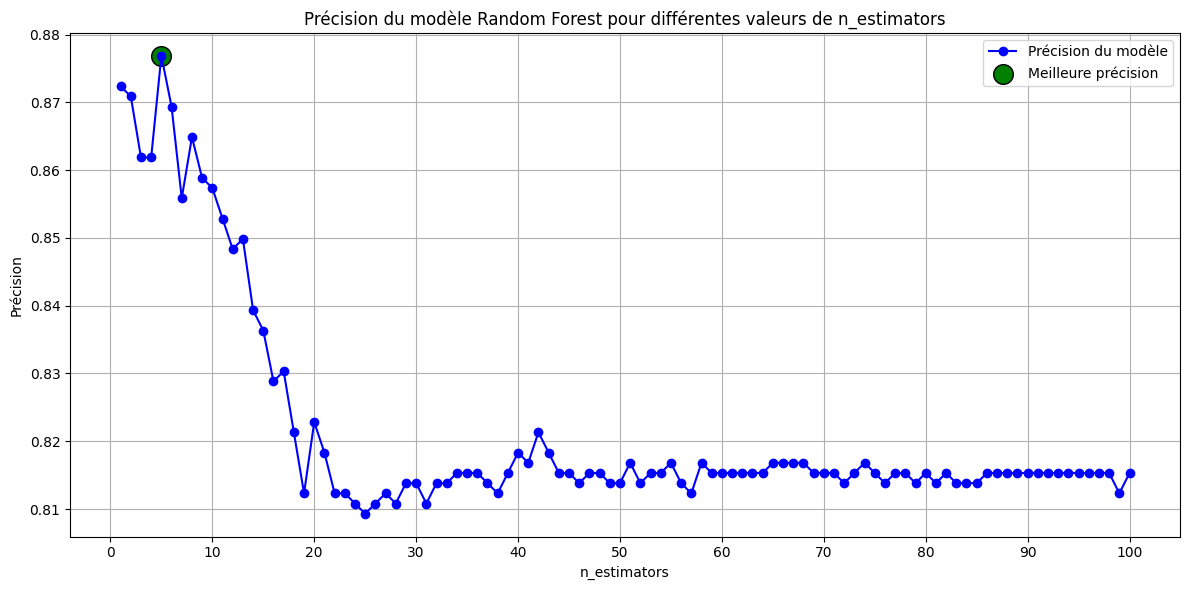

In [793]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Fonction pour entraîner le modèle Random Forest et obtenir la précision
def trainRandomForestAndGetAccuracy(X, y, n_estimators):
    # Diviser les données en ensemble d'entraînement et ensemble de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

    # Créer le classificateur Random Forest avec le nombre d'estimateurs spécifié
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=4, random_state=20)

    # Entraîner le modèle
    clf.fit(X_train, y_train)

    # Prédire sur l'ensemble de test
    y_pred = clf.predict(X_test)

    # Calculer et retourner la précision
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

if __name__ == "__main__":
    # Sélectionner les caractéristiques pertinentes pour le modèle
    features = ['norm_visites', 'norm_kisses', 'norm_distance', 'isHighlighted', 'verified']

    # Préparer les données d'entrée (X) et la variable cible (y)
    X = dataset[features]
    y = dataset['compte_populaire']

    # Listes pour stocker les résultats
    n_estimators_values = list(range(1, 101))
    accuracies = []

    # Itérer sur chaque valeur de n_estimators et calculer la précision
    for n_estimators in n_estimators_values:
        accuracy = trainRandomForestAndGetAccuracy(X, y, n_estimators)
        accuracies.append(accuracy)

    # Trouver l'indice et la valeur de la précision la plus élevée
    best_accuracy = max(accuracies)
    best_index = accuracies.index(best_accuracy)
    best_n_estimators = n_estimators_values[best_index]

    # Afficher la précision la plus élevée avant de tracer
    print(f"Précision la plus élevée atteinte : {best_accuracy:.2f} avec n_estimators={best_n_estimators}")

    # Tracer les résultats
    plt.figure(figsize=(12, 6))
    plt.plot(n_estimators_values, accuracies, marker='o', linestyle='-', color='b', label='Précision du modèle')
    
    # Encadrer en vert le point avec la meilleure précision
    plt.scatter(best_n_estimators, best_accuracy, s=200, c='g', edgecolors='k', marker='o', label='Meilleure précision')
    
    plt.title('Précision du modèle Random Forest pour différentes valeurs de n_estimators')
    plt.xlabel('n_estimators')
    plt.ylabel('Précision')
    plt.xticks(range(0, 101, 10))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


Précision du modèle : 0.95
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       516
           1       0.93      0.86      0.90       150

    accuracy                           0.95       666
   macro avg       0.95      0.92      0.93       666
weighted avg       0.95      0.95      0.95       666



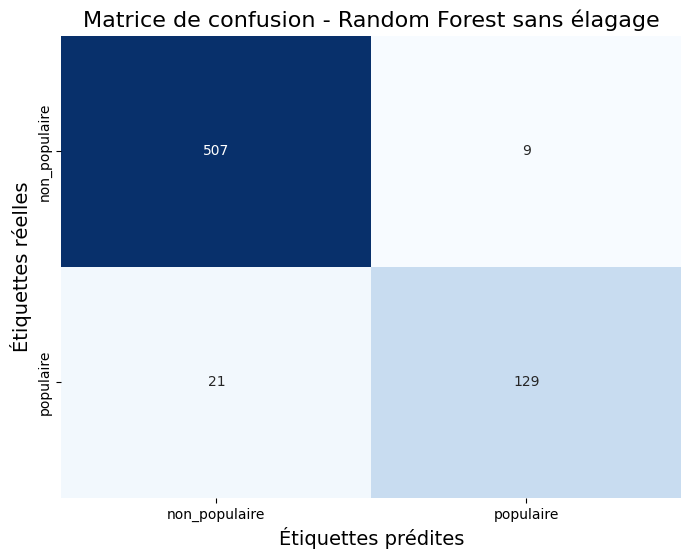

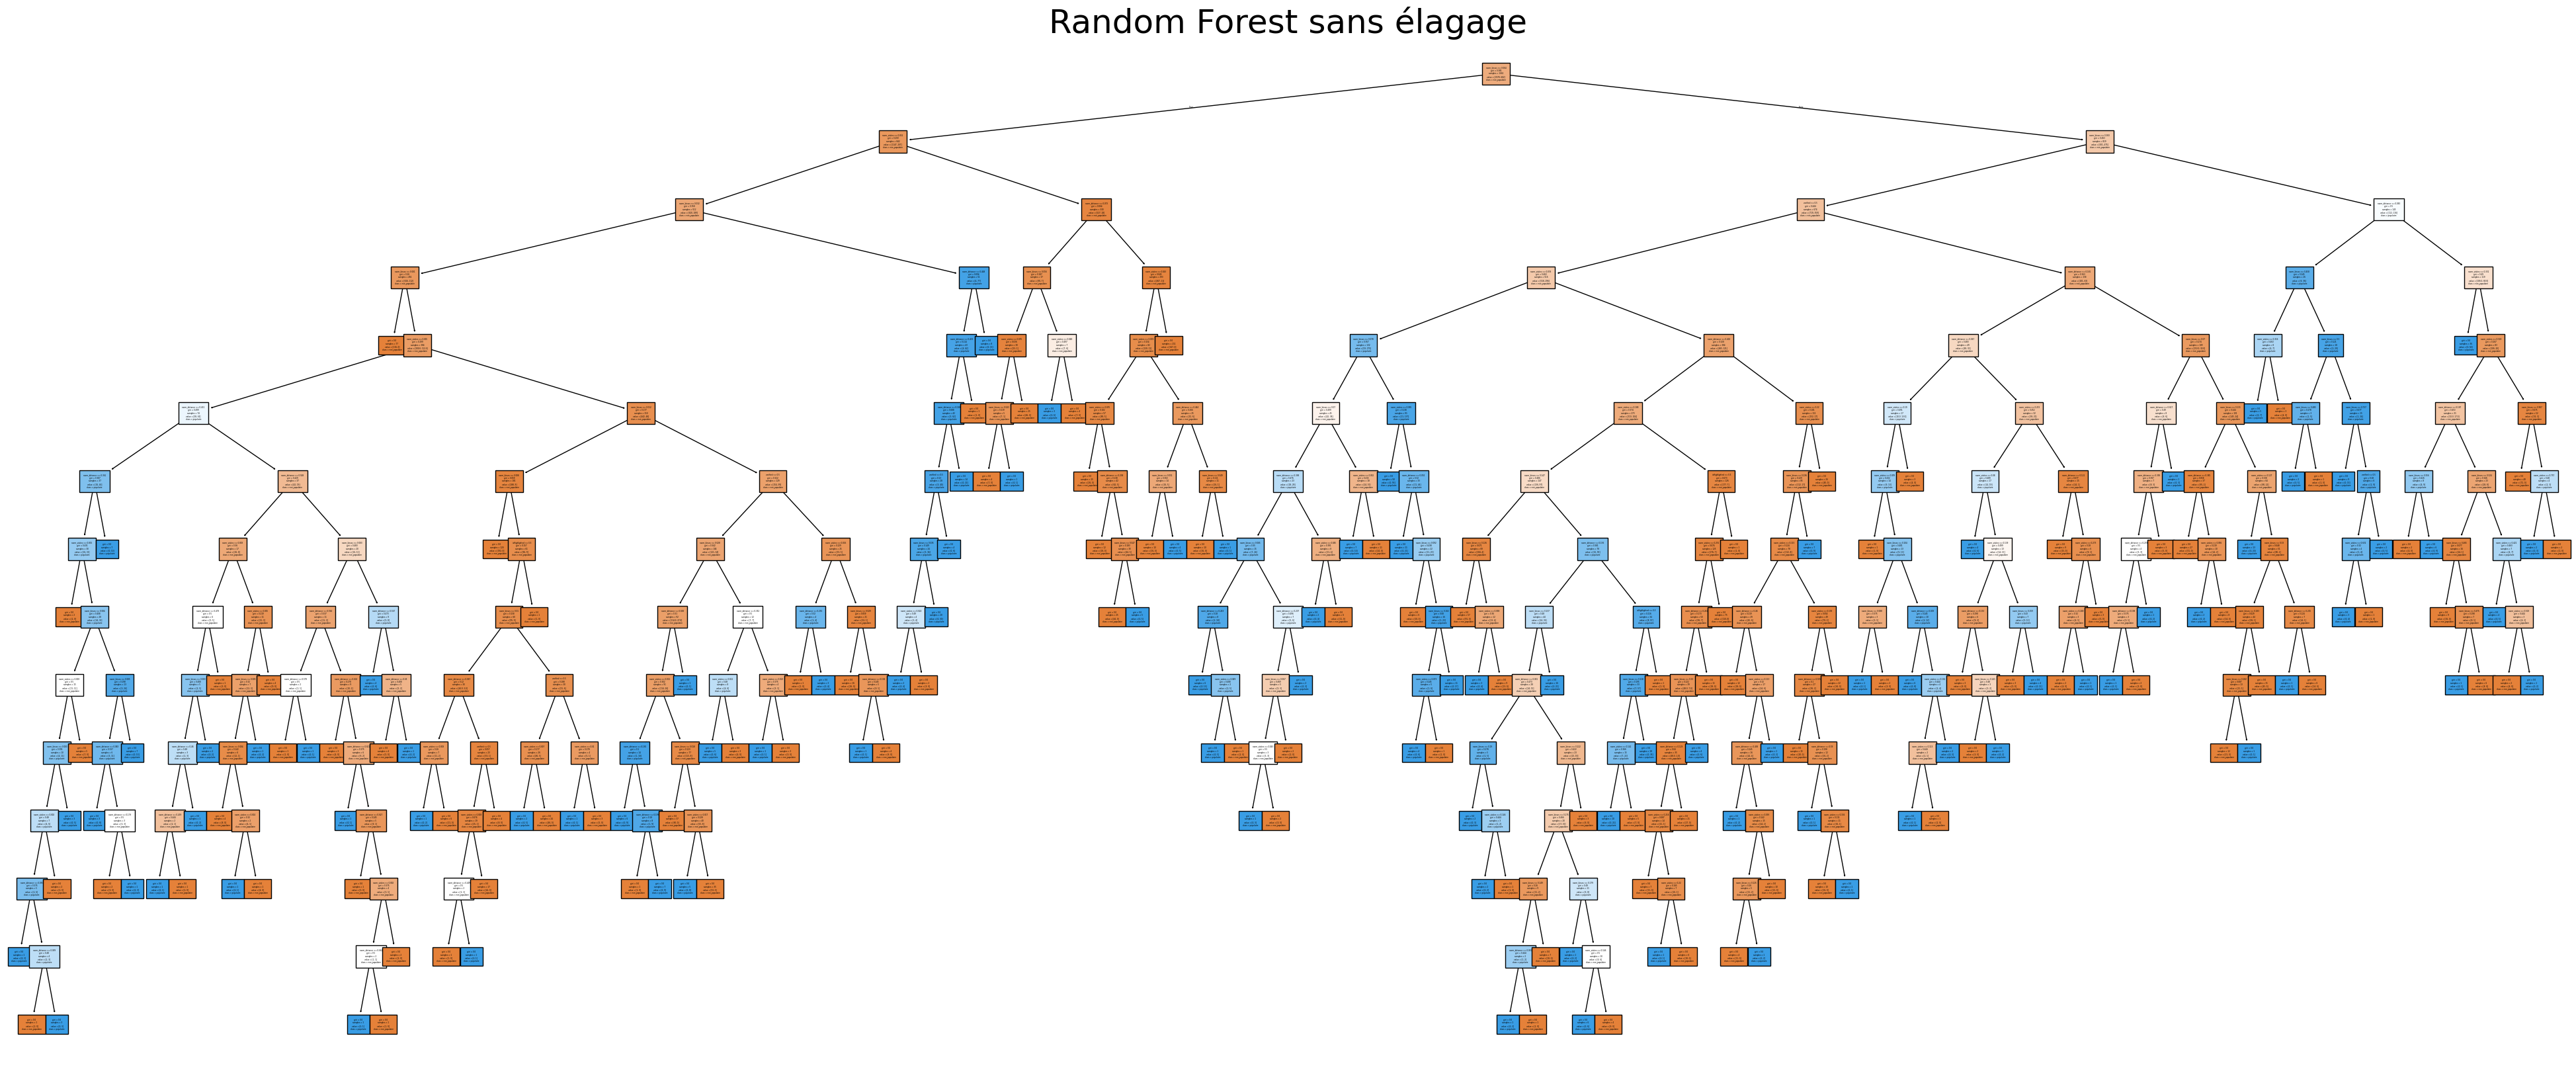

In [799]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Fonction pour entraîner et évaluer le modèle Random Forest
def trainAndEvaluateRandomForest(X, y):
    # Diviser les données en ensemble d'entraînement et ensemble de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

    # Créer le classificateur Random Forest sans limiter la profondeur
    clf = RandomForestClassifier(n_estimators=5, random_state=20)

    # Entraîner le modèle
    clf.fit(X_train, y_train)

    # Prédire sur l'ensemble de test
    y_pred = clf.predict(X_test)

    # Évaluer le modèle
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Précision du modèle : {accuracy:.2f}')

    # Afficher le rapport de classification
    print(classification_report(y_test, y_pred))

    # Afficher la matrice de confusion avec des couleurs
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['non_populaire', 'populaire'], yticklabels=['non_populaire', 'populaire'])
    plt.xlabel('Étiquettes prédites', fontsize=14)
    plt.ylabel('Étiquettes réelles', fontsize=14)
    plt.title('Matrice de confusion - Random Forest sans élagage', fontsize=16)
    plt.show()

    # Tracer l'un des arbres du Random Forest (par exemple, le premier arbre)
    plt.figure(figsize=(50, 20))
    plot_tree(clf.estimators_[0], filled=True, feature_names=X.columns, class_names=['non_populaire', 'populaire'], fontsize=2)  # Ajuste el fontsize a 2
    plt.title("Random Forest sans élagage", fontsize=36)
    plt.show()

if __name__ == "__main__":
    # Sélectionner les caractéristiques pertinentes pour le modèle
    features = ['norm_visites', 'norm_kisses', 'norm_distance', 'isHighlighted', 'verified']

    # Préparer les données d'entrée (X) et la variable cible (y)
    X = dataset[features]
    y = dataset['compte_populaire']

    # Entraîner et évaluer le modèle Random Forest
    trainAndEvaluateRandomForest(X, y)


Précision du modèle : 0.88
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       516
           1       0.97      0.47      0.63       150

    accuracy                           0.88       666
   macro avg       0.92      0.73      0.78       666
weighted avg       0.89      0.88      0.86       666



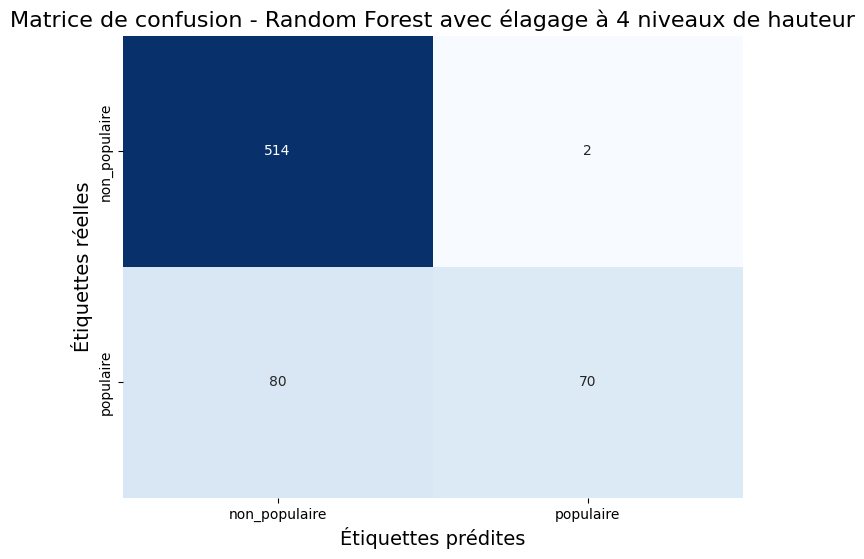

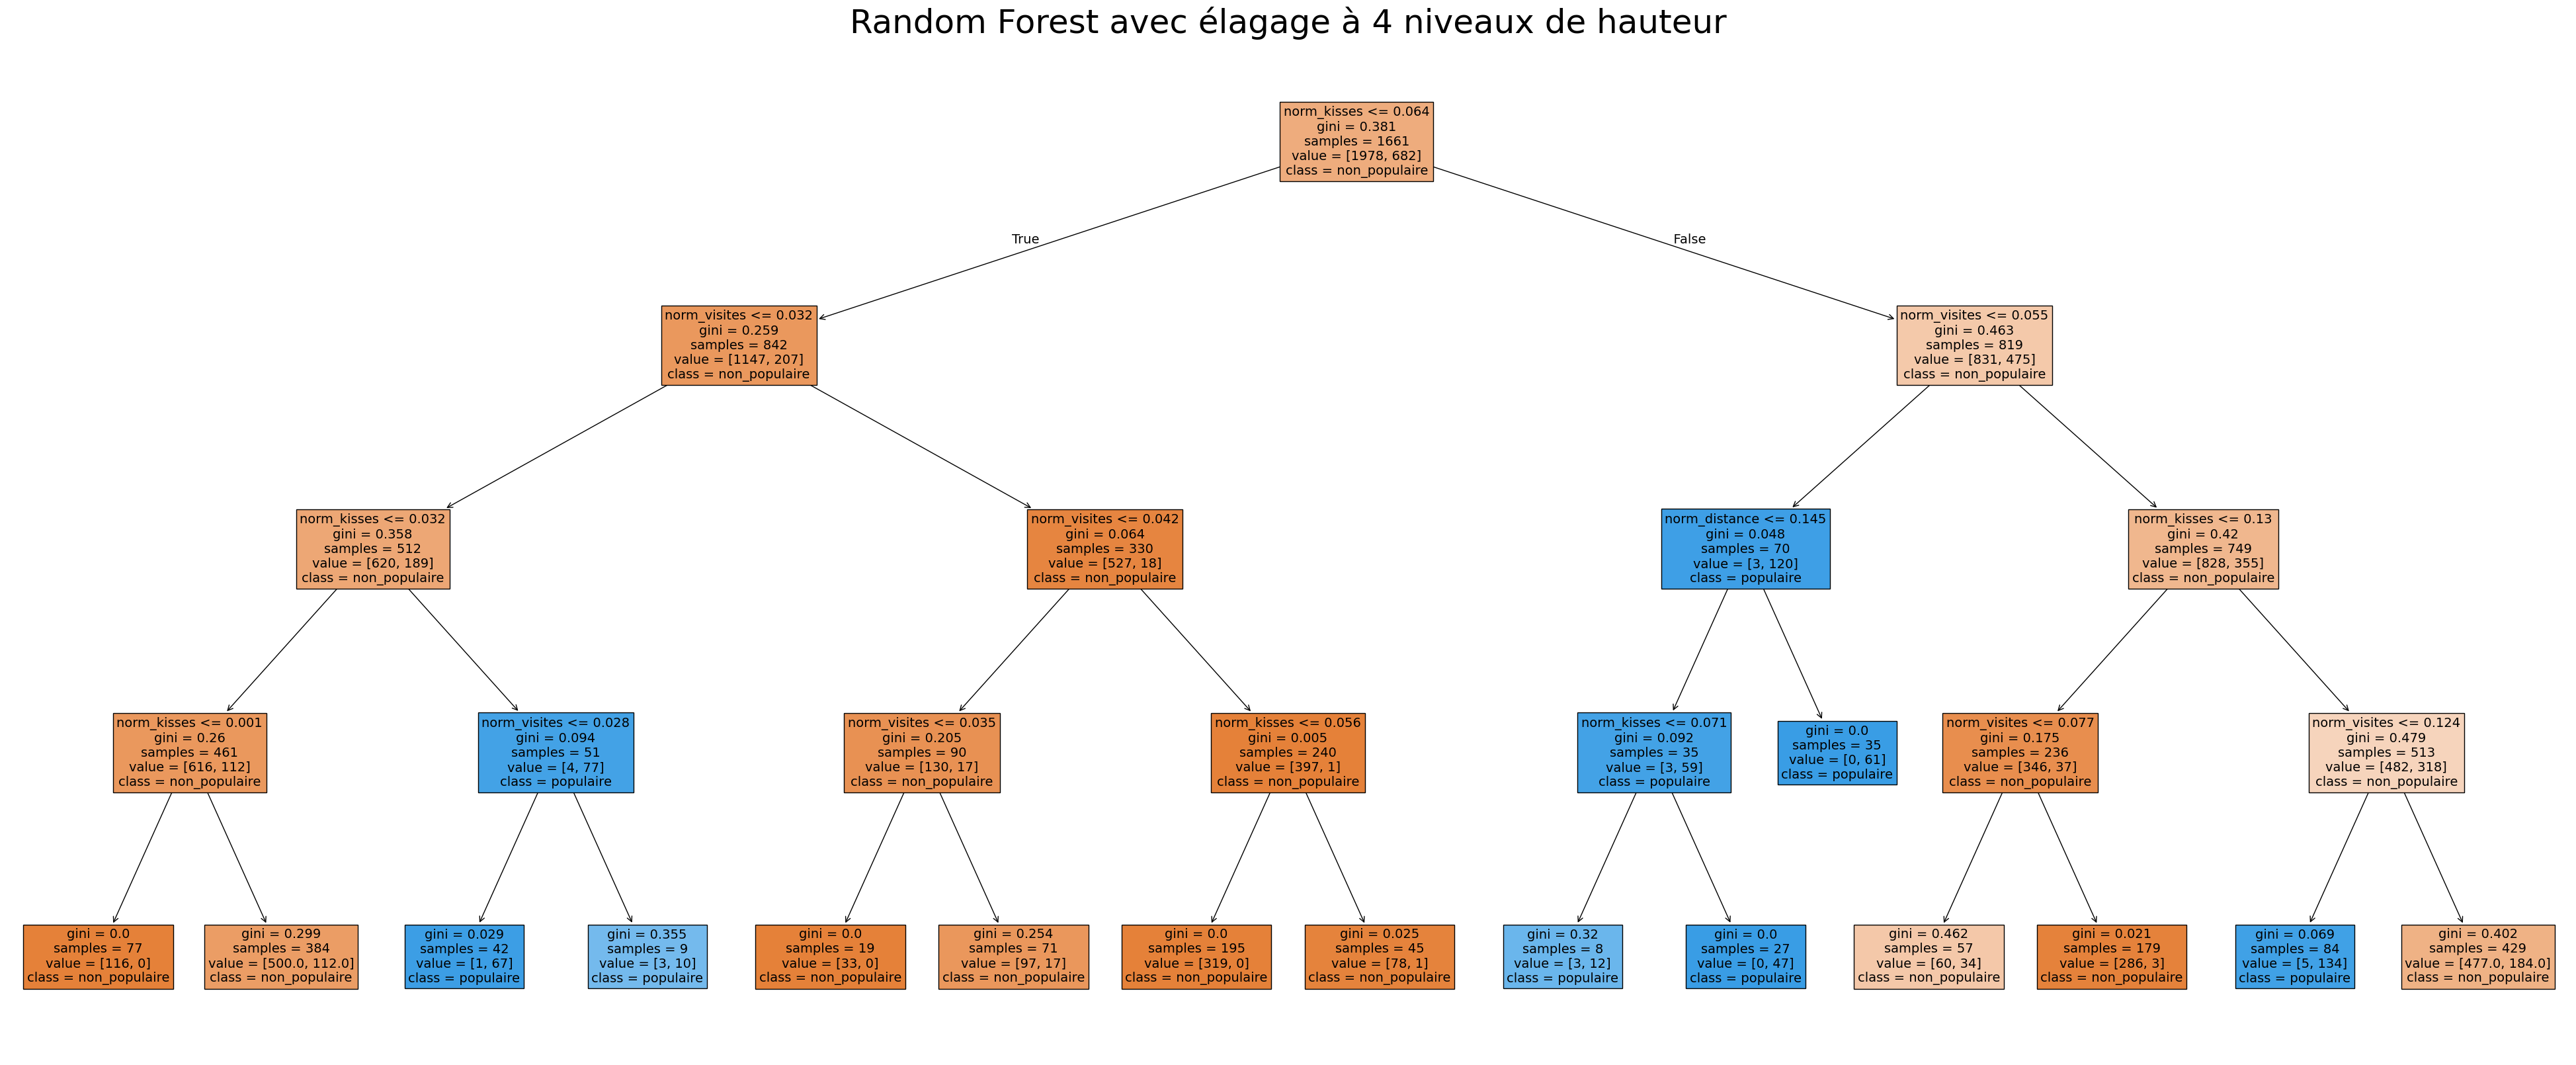

In [800]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Fonction pour entraîner et évaluer le modèle Random Forest
def trainAndEvaluateRandomForest(X, y):
    # Diviser les données en ensemble d'entraînement et ensemble de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

    # Créer le classificateur Random Forest avec élagage limitant la profondeur à 4
    clf = RandomForestClassifier(n_estimators=5, max_depth=4, random_state=20)

    # Entraîner le modèle
    clf.fit(X_train, y_train)

    # Prédire sur l'ensemble de test
    y_pred = clf.predict(X_test)

    # Évaluer le modèle
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Précision du modèle : {accuracy:.2f}')

    # Afficher le rapport de classification
    print(classification_report(y_test, y_pred))

    # Afficher la matrice de confusion avec des couleurs
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['non_populaire', 'populaire'], yticklabels=['non_populaire', 'populaire'])
    plt.xlabel('Étiquettes prédites', fontsize=14)
    plt.ylabel('Étiquettes réelles', fontsize=14)
    plt.title('Matrice de confusion - Random Forest avec élagage à 4 niveaux de hauteur', fontsize=16)
    plt.show()

    # Tracer l'un des arbres du Random Forest (par exemple, le premier arbre)
    plt.figure(figsize=(50, 20))
    plot_tree(clf.estimators_[0], filled=True, feature_names=X.columns, class_names=['non_populaire', 'populaire'], fontsize=14, max_depth=4)  # Limiter la profondeur maximale de l'arbre
    plt.title("Random Forest avec élagage à 4 niveaux de hauteur", fontsize=36)
    plt.show()

if __name__ == "__main__":
    # Sélectionner les caractéristiques pertinentes pour le modèle
    features = ['norm_visites', 'norm_kisses', 'norm_distance', 'isHighlighted', 'verified']

    # Préparer les données d'entrée (X) et la variable cible (y)
    X = dataset[features]
    y = dataset['compte_populaire']

    # Entraîner et évaluer le modèle Random Forest
    trainAndEvaluateRandomForest(X, y)


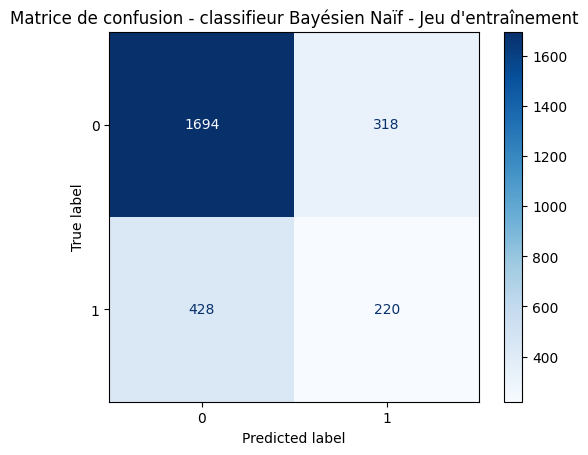

Score sur le jeu d'entraînement :  0.7195488721804512


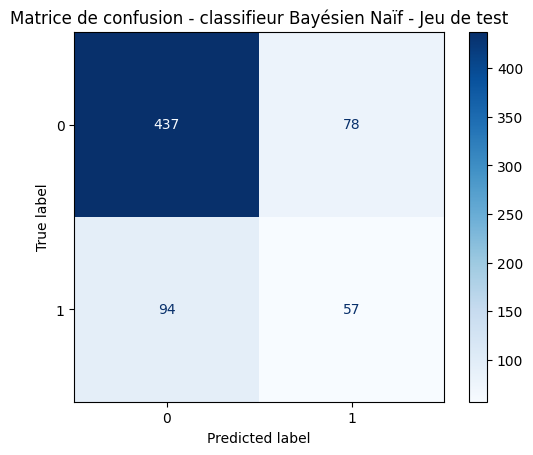

Score sur le jeu de test :  0.7417417417417418


In [802]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Fonction pour créer et entraîner un classifieur Bayésien Naïf avec sélection de caractéristiques
def bayesianClass(X_train, Y_train):
    clf = GaussianNB()
    clf.fit(X_train, np.ravel(Y_train))
    return clf

# Fonction pour générer et afficher une matrice de confusion en utilisant ConfusionMatrixDisplay
def confusionMatrixBC(bayesianClass, X_train, Y_train, X_test, Y_test):
    # Obtenir les prédictions
    Y_pred_train = bayesianClass.predict(X_train)
    Y_pred_test = bayesianClass.predict(X_test)
    
    # Créer la figure et les axes pour la matrice de confusion du jeu d'entraînement
    disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_train, Y_pred_train))
    disp_train.plot(cmap='Blues', values_format='d')
    plt.title("Matrice de confusion - classifieur Bayésien Naïf - Jeu d'entraînement")
    plt.show()
    print("Score sur le jeu d'entraînement : ", bayesianClass.score(X_train, Y_train))
    
    # Créer la figure et les axes pour la matrice de confusion du jeu de test
    disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred_test))
    disp_test.plot(cmap='Blues', values_format='d')
    plt.title("Matrice de confusion - classifieur Bayésien Naïf - Jeu de test")
    plt.show()
    print("Score sur le jeu de test : ", bayesianClass.score(X_test, Y_test))

if __name__ == "__main__":
  
    # Charger les données depuis votre source de données
    # Ici, nous supposerons que vous avez chargé votre ensemble de données dans un DataFrame 'dataset'
    
    # Spécifier les colonnes pertinentes pour X et Y
    colonnes_X = ['norm_visites', 'norm_kisses', 'norm_distance', 'isHighlighted', 'verified']
    colonne_Y = 'compte_populaire'

    # Sélectionner les caractéristiques les plus pertinentes avec SelectKBest et chi2
    X = dataset[colonnes_X]
    Y = dataset[colonne_Y]
    selector = SelectKBest(score_func=chi2, k=3)
    X_selected = selector.fit_transform(X, Y)
    
    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

    # Entraîner et évaluer le classifieur Bayésien Naïf avec les caractéristiques sélectionnées
    bc = bayesianClass(X_train, Y_train)
    confusionMatrixBC(bc, X_train, Y_train, X_test, Y_test)

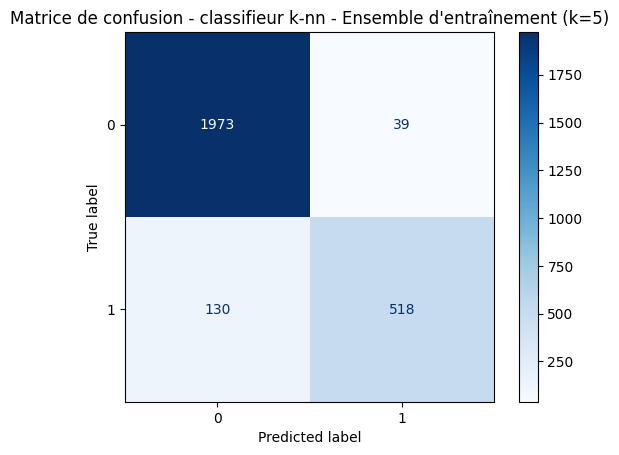

Précision dans l'ensemble d'entraînement: 0.9365


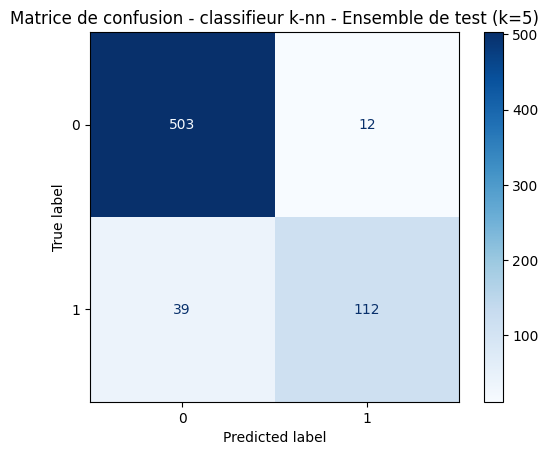

Précision dans l'ensemble de test: 0.9234


In [803]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Fonction pour créer et entraîner un classifieur k-nn
def knnClass(k, X_train, Y_train):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, np.ravel(Y_train))
    return clf

# Fonction pour générer et afficher une matrice de confusion en utilisant ConfusionMatrixDisplay
def confusionMatrixknn(knnClass, X_train, Y_train, X_test, Y_test):
    # Obtenir les prédictions dans les deux ensembles
    Y_pred_train = knnClass.predict(X_train)
    Y_pred_test = knnClass.predict(X_test)
    
    # Calculer la précision dans les deux ensembles
    train_accuracy = accuracy_score(Y_train, Y_pred_train)
    test_accuracy = accuracy_score(Y_test, Y_pred_test)
    
    # Créer la figure et les axes pour la matrice de confusion dans l'ensemble d'entraînement
    disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_train, Y_pred_train))
    disp_train.plot(cmap='Blues', values_format='d')
    plt.title(f"Matrice de confusion - classifieur k-nn - Ensemble d'entraînement (k={knnClass.n_neighbors})")
    plt.show()
    print(f"Précision dans l'ensemble d'entraînement: {train_accuracy:.4f}")
    
    # Créer la figure et les axes pour la matrice de confusion dans l'ensemble de test
    disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred_test))
    disp_test.plot(cmap='Blues', values_format='d')
    plt.title(f"Matrice de confusion - classifieur k-nn - Ensemble de test (k={knnClass.n_neighbors})")
    plt.show()
    print(f"Précision dans l'ensemble de test: {test_accuracy:.4f}")

if __name__ == "__main__":

    # Spécifier les colonnes pertinentes pour X et Y
    colonnes_X = ['norm_visites', 'norm_kisses', 'norm_distance', 'isHighlighted', 'verified']
    colonne_Y = 'compte_populaire'

    # Séparer les données en caractéristiques (X) et variable cible (Y)
    X = dataset[colonnes_X]
    Y = dataset[colonne_Y]

    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Tester différentes valeurs de k et évaluer le classifieur k-nn
    best_k = None
    best_test_accuracy = -1
    
    for k in range(1, 50):
        knn = knnClass(k, X_train, Y_train)
        
        # Calculer la précision dans l'ensemble de test pour décider de la meilleure k
        Y_pred_test = knn.predict(X_test)
        test_accuracy = accuracy_score(Y_test, Y_pred_test)
        
        # Mettre à jour la meilleure k si une meilleure précision est trouvée
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_k = k
    
    # Entraîner et afficher les résultats uniquement pour la meilleure k trouvée
    best_knn = knnClass(best_k, X_train, Y_train)
    confusionMatrixknn(best_knn, X_train, Y_train, X_test, Y_test)
